In [1]:
import re
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import collections
import numpy as np
import nltk
from nltk.corpus import stopwords

In [10]:
try:
    nltk.data.find('corpora/stopwords.zip')
except LookupError:
    nltk.download('stopwords')

stop_words = set(stopwords.words('english'))


In [11]:
user = input("Write your site: ")
url = f"https://en.wikipedia.org/wiki/{user}"

def get_content(article_url):
    request = requests.get(article_url)
    soup = BeautifulSoup(request.text, "html.parser")
    content_div = soup.find("div", class_="mw-content-ltr mw-parser-output", dir="ltr")
    cleaned_text = content_div.get_text(strip=True, separator=' ')
    cleaned_text = ' '.join(cleaned_text.split())
    return cleaned_text

content = get_content(url)

In [4]:
def merge_contents(data):
    cleaned_content = re.sub(r'\[\[.*?\]\]|\{.*?\}|<.*?>', '', data)
    return cleaned_content

merge_content = merge_contents(content)

In [5]:
def tokenize(param):
    cleaned_list = re.findall(r'\b\w+\b', param.lower())
    cleaned_list = [word for word in cleaned_list if word.lower() not in stop_words and word.lower() not in ["nm", "bm", "doi",
                                                                                                             "uv", "may", "cfcs",
                                                                                                             "pmid", "also", '10',
                                                                                                             '3', '9', '2', 'c', 'b',
                                                                                                             '5', '2011', '1', 'epa', '100']]
    return cleaned_list

tokens = tokenize(merge_content)

In [6]:
def lower_collection(param):
    text = ''.join(param)
    lowercased_text = text.lower()
    cleaned_list = lowercased_text.split()
    return cleaned_list

lower = lower_collection(tokens)

In [7]:
def count_frequency(collection):
    frequencies = {}
    for word in collection:
        frequencies[word] = frequencies.get(word, 0) + 1
    return frequencies

count = count_frequency(lower)

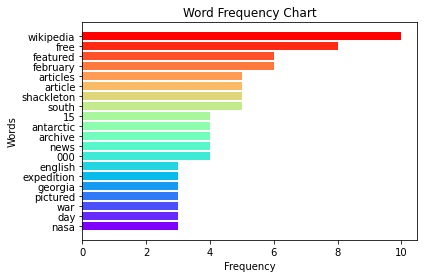

In [8]:
def plot_most_frequent(tokens, top_n):
    top = collections.Counter(tokens)
    sorted_word = sorted(top.items(), key=lambda x: x[1], reverse=True)[:top_n][::-1]
    words, frequencies = zip(*sorted_word)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(words)))

    plt.barh(words, frequencies, color=colors)
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title('Word Frequency Chart')
    plt.show()

plot_most_frequent(tokens, 20)

In [9]:
# def matplotlib(cleaned_list, top_n):
#     top = collections.Counter(cleaned_list)
#     sorted_word = sorted(top.items(), key=lambda x: x[1], reverse=True)[:top_n][::-1]
#     words, frequencies = zip(*sorted_word)
#     colors = plt.cm.rainbow(np.linspace(0, 1, len(words)))

#     plt.barh(words, frequencies, color=colors)
#     plt.xlabel('Frequency')
#     plt.ylabel('Words')
#     plt.title('Word Frequency Chart')
#     plt.show()

# matplotlib(tokens, 20)

In [ ]:
{
 "cells": [
  {
   "cell_type": "code",
   "execution_count": 1,
   "metadata": {},
   "outputs": [],
   "source": [
    "import re\n",
    "import requests\n",
    "from bs4 import BeautifulSoup\n",
    "import matplotlib.pyplot as plt\n",
    "import collections\n",
    "import numpy as np\n",
    "import nltk\n",
    "from nltk.corpus import stopwords"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 2,
   "metadata": {},
   "outputs": [],
   "source": [
    "try:\n",
    "    nltk.data.find('corpora/stopwords.zip')\n",
    "except LookupError:\n",
    "    nltk.download('stopwords')\n",
    "\n",
    "stop_words = set(stopwords.words('english'))\n",
    "\n",
    "url = \"https://en.wikipedia.org/wiki/Ozone_layer\""
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 3,
   "metadata": {},
   "outputs": [],
   "source": [
    " user = input("Write your site: ")
"    url = f"https://en.wikipedia.org/wiki/{user}"

"    def get_content(article_url):"
"        request = requests.get(article_url)"
"        soup = BeautifulSoup(request.text, "html.parser")"
"        content_div = soup.find("div", class_="mw-content-ltr mw-parser-output", dir="ltr")"
        cleaned_text = content_div.get_text(strip=True, separator=' ')
        cleaned_text = ' '.join(cleaned_text.split())
        return cleaned_text

    content = get_content(url)"
    "\n",
    "content = get_content(url)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 4,
   "metadata": {},
   "outputs": [],
   "source": [
    "def merge_contents(data):\n",
    "    cleaned_content = re.sub(r'\\[\\[.*?\\]\\]|\\{.*?\\}|<.*?>', '', data)\n",
    "    return cleaned_content\n",
    "\n",
    "merge_content = merge_contents(content)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 5,
   "metadata": {},
   "outputs": [],
   "source": [
    "def tokenize(param):\n",
    "    cleaned_list = re.findall(r'\\b\\w+\\b', param.lower())\n",
    "    cleaned_list = [word for word in cleaned_list if word.lower() not in stop_words and word.lower() not in [\"nm\", \"bm\", \"doi\",\n",
    "                                                                                                             \"uv\", \"may\", \"cfcs\",\n",
    "                                                                                                             \"pmid\", \"also\", '10',\n",
    "                                                                                                             '3', '9', '2', 'c', 'b',\n",
    "                                                                                                             '5', '2011', '1', 'epa', '100']]\n",
    "    return cleaned_list\n",
    "\n",
    "tokens = tokenize(merge_content)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 6,
   "metadata": {},
   "outputs": [],
   "source": [
    "def lower_collection(param):\n",
    "    text = ''.join(param)\n",
    "    lowercased_text = text.lower()\n",
    "    cleaned_list = lowercased_text.split()\n",
    "    return cleaned_list\n",
    "\n",
    "lower = lower_collection(tokens)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 7,
   "metadata": {},
   "outputs": [],
   "source": [
    "def count_frequency(collection):\n",
    "    frequencies = {}\n",
    "    for word in collection:\n",
    "        frequencies[word] = frequencies.get(word, 0) + 1\n",
    "    return frequencies\n",
    "\n",
    "count = count_frequency(lower)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 8,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "[('regionstratosphereozoneoxygencycleozonelayerozonelayerozoneshieldregionearthstratosphereabsorbssunultravioletradiationcontainshighconcentrationozonerelationpartsatmospherealthoughstillsmallrelationgasesstratosphereozonelayercontainslesspartspermillionozoneaverageozoneconcentrationearthatmospherewhole0partspermillionozonelayermainlyfoundlowerportionstratosphereapproximately1535kilometers22miearthalthoughthicknessvariesseasonallygeographicallyozonelayerdiscovered1913frenchphysicistscharlesfabryhenribuissonmeasurementssunshowedradiationsentsurfacereachinggroundearthusuallyconsistentspectrumblackbodytemperaturerange5006000k230730exceptradiationwavelength310ultravioletendspectrumdeducedmissingradiationabsorbedsomethingatmosphereeventuallyspectrummissingradiationmatchedoneknownchemicalozonepropertiesexploreddetailbritishmeteorologistgdobsondevelopedsimplespectrophotometerdobsonmetercouldusedmeasurestratosphericozoneground19281958dobsonestablishedworldwidenetworkozonemonitoringstationscontinueoperatedaydobsonunitconvenientmeasureamountozoneoverheadnamedhonorozonelayerabsorbs9799percentsunmediumfrequencyultravioletlight200315wavelengthotherwisewouldpotentiallydamageexposedlifeformsnearsurface1976atmosphericresearchrevealedozonelayerdepletedchemicalsreleasedindustrymainlychlorofluorocarbonsconcernsincreasedradiationdueozonedepletionthreatenedlifeearthincludingincreasedskincancerhumansecologicalproblems4ledbanschemicalslatestevidenceozonedepletionslowedstoppedunitednationsgeneralassemblydesignatedseptember16internationaldaypreservationozonelayervenusthinozonelayeraltitudekilometersplanetsurfacesourcesmainarticleozoneoxygencyclephotochemicalmechanismsgiveriseozonelayerdiscoveredbritishphysicistsydneychapman1930ozoneearthstratospherecreatedultravioletlightstrikingordinaryoxygenmoleculescontainingtwooxygenatomssplittingindividualoxygenatomsatomicoxygenatomicoxygencombinesunbrokencreateozoneozonemoleculeunstablealthoughstratospherelonglivedultravioletlighthitsozonesplitsmoleculeindividualatomoxygencontinuingprocesscalledozoneoxygencyclechemicallydescribedhνnu_2o90percentozoneatmospherecontainedstratosphereozoneconcentrationsgreatest2040kilometres66000131000ftrange8partspermillionozonecompressedpressureairsealevelwouldmillimetres8inchthick6ultravioletlightenergylevelsseveralaltitudesbluelineshowsdnasensitivityredlineshowssurfaceenergylevelpercentdecreaseozonelevelsozonevariousaltitudesblockingdifferentbandsultravioletradiationessentially280blockeddioxygen200elseozone200280atmosphereshorterportionbandenergeticbandcausesformationozonelayersingleoxygenatomsproducedphotolysisdioxygen240reactdioxygenozonelayerblocksquitesunburnproducing280315bandlieswavelengthslongerbandclosestvisiblelight315400hardlyaffectedozonereachesgroundprimarilycauseskinreddeningevidencecauseslongtermskindamagealthoughconcentrationozoneozonelayersmallvitallyimportantlifeabsorbsbiologicallyharmfulultravioletradiationcomingsunextremelyshortvacuumscreenednitrogenradiationcapablepenetratingnitrogendividedthreecategoriesbasedwavelengthreferred400315315280280harmfullivingthingsentirelyscreenedcombinationdioxygen200around35kilometres115000ftaltituderadiationharmfulskinmaincausesunburnexcessiveexposurecausecataractsimmunesystemsuppressiongeneticdamageresultingproblemsskincancerozonelayerabsorbs200310maximalabsorption2507effectivescreeningradiationwavelength290intensitytopatmosphere350milliontimesstrongerearthsurfaceneverthelessparticularlylongestwavelengthsreachessurfaceimportantskinproductionvitaminmammalsozonetransparentlongerwavelengthradiationreachessurfaceconstitutesreachingearthtyperadiationsignificantlylessharmfuldnaalthoughstillpotentiallycausephysicaldamageprematureagingskinindirectgeneticdamageskincancer8distributionstratospheresectionneedsadditionalcitationsverificationpleasehelpimprovearticleaddingcitationsreliablesourcessectionunsourcedmaterialchallengedremovedfebruary2013learnremovetemplatemessagethicknessozonelayervariesworldwidegenerallythinnernearequatorthickernearpolesthicknessrefersmuchozonecolumngivenareavariesseasonseasonreasonsvariationsdueatmosphericcirculationpatternssolarintensitymajorityozoneproducedtropicstransportedtowardspolesstratosphericwindpatternsnorthernhemispherepatternsknownbrewerdobsoncirculationmakeozonelayerthickestspringthinnestfallozoneproducedsolarradiationtropicsdonecirculationliftingozonepoorairtropospherestratospheresunphotolyzesoxygenmoleculesturnsozoneozonerichaircarriedhigherlatitudesdropslowerlayersatmosphereresearchfoundozonelevelsunitedstateshighestspringmonthsaprillowestoctobertotalamountozoneincreasesmovingtropicshigherlatitudesconcentrationsgreaterhighnorthernlatitudeshighsouthernlatitudesspringozonecolumnshighnorthernlatitudesoccasionallyexceeding600duaveraging450duwhereas400duconstitutedusualmaximumantarcticanthropogenicozonedepletiondifferenceoccurrednaturallyweakerpolarvortexstrongerbrewerdobsoncirculationnorthernhemisphereowinghemispherelargemountainrangesgreatercontrastslandoceantemperatures11differencehighnorthernsouthernlatitudesincreasedsince1970sdueozoneholephenomenonhighestamountsozonefoundarcticspringmonthsmarchaprilantarcticlowestamountsozonesummermonthsseptemberoctoberbrewerdobsoncirculationozonelayerdepletionmainarticleozonedepletionnasaprojectionsstratosphericozoneconcentrationschlorofluorocarbonsbannedozonelayerdepletedfreeradicalcatalystsincludingnitricoxidenitrousoxidenhydroxylohatomicchlorineclatomicbrominebrnaturalsourcesspeciesconcentrationschlorinebromineincreasedmarkedlyrecentdecadesreleaselargequantitiesmanmadeorganohalogencompoundsespeciallychlorofluorocarbonsbromofluorocarbons12highlystablecompoundscapablesurvivingrisestratosphereclbrradicalsliberatedactionultravioletlightradicalfreeinitiatecatalyzechainreactioncapablebreaking000ozonemolecules2009nitrousoxidelargestozonedepletingsubstanceodsemittedhumanactivities13breakdownozonestratosphereresultsreducedabsorptionultravioletradiationconsequentlyunabsorbeddangerousultravioletradiationablereachearthsurfacehigherintensityozonelevelsdroppedworldwideaverage4percentsincelate1970sapproximatelypercentearthsurfacearoundnorthsouthpolesmuchlargerseasonaldeclinesseendescribedozoneholesozoneholesactuallypatchesozonelayerozonethinnerthinnestpartsozonepolarpointsearthaxis14discoveryannualdepletionozoneantarcticfirstannouncedjoefarmanbriangardinerjonathanshanklinpaperappearednature161985regulationattemptsincludedlimitedcleanairactimplementedunitedstatesenvironmentalprotectionagencycleanairactintroducedrequirementnationalambientairqualitystandardsnaaqsozonepollutionsonesixcriteriapollutantsregulationproveneffectivesincecountiescitiestribalregionsmustabidestandardsprovidesassistanceregionregulatecontaminants15effectivepresentationinformationprovenimportantordereducategeneralpopulationexistenceregulationozonedepletioncontaminantsscientificpaperwrittensheldonungarauthorexploresstudiesinformationdepletionozoneclimatechangevariousrelatedtopicsozonecasecommunicatedlaypersonseasyunderstandbridgingmetaphorsderivedpopularculturerelatedimmediateriskseverydayrelevance16specificmetaphorsuseddiscussionozoneshieldozoneholeprovedquiteusefulcomparedglobalclimatechangeozonecasemuchseenhotissueimminentrisklaypeoplecautiousdepletionozonelayerrisksskincancerbadozonecauseadversehealthrisksrespiratoryeffectsdifficultybreathingprovenaggravatorrespiratoryillnessesasthmacopdemphysema17manycountriessetplaceregulationsimprovegoodozonepreventincreasebadozoneurbanresidentialareastermsozoneprotectionpreservationgoodozoneeuropeanunionstrictguidelinesproductsallowedboughtdistributedusedspecificareas18effectiveregulationozoneexpectedhealtime19levelsatmosphericozonemeasuredsatelliteshowclearseasonalvariationsappearverifydeclinetimemainarticleozonedepletionclimatechange1978unitedstatescanadanorwayenactedbanscfccontainingaerosolspraysdamageozonelayereuropeancommunityrejectedanalogousproposaluchlorofluorocarbonscontinuedusedapplicationsrefrigerationindustrialcleaningdiscoveryantarcticozonehole1985negotiationinternationaltreatymontrealprotocolcfcproductioncapped1986levelscommitmentslongtermreductions20allowedtenyearphasedevelopingcountries21identifiedarticleprotocolsincetimetreatyamendedbancfcproduction1995developedcountrieslaterdevelopingcountries22todayworld197countriessignedtreatybeginningjanuary1996recycledstockpiledavailableusedevelopedcountrieslikeusproductionphaseoutpossibleeffortsensurewouldsubstitutechemicalstechnologiesodsuses23august2003scientistsannouncedglobaldepletionozonelayerslowinginternationalregulationozonedepletingsubstancesstudyorganizedamericangeophysicalunionthreesatellitesthreegroundstationsconfirmedupperatmosphereozonedepletionrateslowedsignificantlypreviousdecadebreakdownexpectedcontinueodssusednationsbannedgasesalreadystratosphereodssincludinglongatmosphericlifetimesranging50yearsestimatedozonelayerrecover1980levelsnearmiddle21stcentury24gradualtrendtowardhealingreported201625compoundscontaininghbondshydrochlorofluorocarbonshcfcsdesignedreplacecertainapplicationsreplacementcompoundsreactivelesslikelysurvivelongenoughatmospherereachstratospherecouldaffectozonelayerlessdamaginghcfcsnegativeimpactozonelayerphased26turnreplacedhydrofluorocarbonshfcscompoundsdestroystratosphericozoneresidualeffectsaccumulatingwithinatmosphereleadconcentrationgradientatmosphereoceanorganohalogencompoundabledissolveoceansurfacewatersableacttimedependenttracertracerhelpsscientistsstudyoceancirculationtracingbiologicalphysicalchemicalpathways27implicationsastronomyozoneatmospherepreventsenergeticultravioletradiationreachingsurfaceearthastronomicaldatawavelengthsgatheredsatellitesorbitingatmosphereozonelayerlightyounghotstarsultravioletstudywavelengthsimportantstudyingoriginsgalaxiesgalaxyevolutionexplorergalexorbitingultravioletspacetelescopelaunchedapril282003operatedearly201228galeximagecygnusloopnebulacouldtakensurfaceearthozonelayerblocksultravioletradiationemittednebulaseecambrianexplosionnuclearwinteroxygenunitednationsenvironmentprogrammeshortlivedclimatepollutantsreferencesozonebasicsnoaamarch202008archivedoriginalnovember212017retrievedjanuary292007mcelroyfogalpf2008ozonediscoveryprotectionatmosphereocean46133137ao460101s2cid128994884ozonelayerretrievedseptember232007interviewleethomas6thadministratorvideotranscriptseep13april192012spacecomstaffoctober11scientistsdiscoverozonelayervenusspacecompurchretrievedoctober2015nasafactsarchiveretrievedjunematsumikawasaki2003photolysisatmosphericozoneultravioletregionpdfchemrev10312476747811021cr020525514664632archivedoriginalpdfjune172012retrievedmarch142015narayananlsaladirnfoxjl2010reviewultravioletradiationskincancerinternationaljournaldermatology499789861111j13654632201004474x20883261s2cid22224492tabinshagoon2008globalwarmingeffectozonedepletionaphpublishingp194isbn9788131303962retrievedjanuary122016nasaozonewatchozonefactsozonewatchgsfcnasagovretrievedseptember162021douglassannernewmanpaulsolomonsusan2014antarcticozoneholeupdatephysicstodayamericaninstitutephysics6774248bibcode2014pht67g42d1063pt2449hdl172199159halocarbonsgasesemissionsgreenhousegasesunitedstates1996energyinformationadministration1997archivedoriginaljune292008retrievedjune242008noaastudyshowsnitrousoxidetopozonedepletingemissionnoaaaugust272009retrievednovember8ozonelayernationalgeographicsocietyeducationnationalgeographicorgretrieved302022usoardecember142016ozoneimplementationregulatoryactionswwwgovretrieved302022ungarsheldonjuly2000knowledgeignorancepopularcultureclimatechangeversusozoneholepublicunderstandingscience297312108809636625306issn09636625s2cid7089937zhangjunfengjimweiyongjiefangzhangfu2019ozonepollutionmajorhealthhazardworldwidefrontiersimmunology25183389fimmu201902518issn16643224pmc683452831736954ozoneregulationeceuropaeuretrieved302022usoarjuly152015internationaltreatiescooperationprotectionstratosphericozonelayerwwwgovretrieved302022morrisettepeter1989evolutionpolicyresponsesstratosphericozonedepletionnaturalresourcesjournal29793820retrievedapril202010interviewleethomas6thadministratorvideotranscriptseep15april192012amendmentsmontrealprotocolaugust192010retrievedmarch28briefquestionsanswersozonedepletionjune282006retrievednovember8stratosphericozonesurfaceultravioletradiationpdfscientificassessmentozonedepletion2010wmoretrievedmarch142015solomonsusanetaljune302016emergencehealingantarcticozonelayerscience353629626974bibcode2016sci353269s1126scienceaae006127365314ozonedepletionglossaryretrievedseptember2008fineranaobservationssf6oceantracerspdfannualreviewmarinescience17395bibcode2011arms173f1146annurevmarine01090816393321329203archivedoriginalpdffebruary2015ozonelayernationalgeographicsocietyretrievedseptember162021readingscienceandersen2015lessonsstratosphericozonelayerprotectionclimatejournalenvironmentalstudiessciences1431621007s134120140213s2cid129725437andersensarmaksinclairl2012protectingozonelayerunitednationshistorytaylorfrancisisbn978849772266ritchiehannahlearnedacidrainworkingtogethernationsworldsolveclimatechangescientificamericanvol330january2024pp7576ountriesactknowotherswillingacidrainactcollectivelysomethingsimilarrestoreearthprotectiveozonelayercosttechnologyreallymatterspastdecadepricesolarenergyfallen90percentwindenergy70percentbatterycoststumbled98percentsince1990bringingpriceelectriccarsstanceelectedofficialsmatterspartyaffiliationchangehappenneeddrivep76unitednationsenvironmentprogramme2010environmentaleffectsozonedepletioninteractionsclimatechange2010assessmentnairobiunepveldersgjfaheywdanieljmcfarlandandersen2009largecontributionprojectedhfcemissionsfutureclimateforcingproceedingsnationalacademysciences106271094910954bibcode2009pnas10610949v1073pnas0902817106pmc270015019549868s2cid3743609veldersguusjandersenstephendanieljohnfaheydavidwmcfarlandmack2007importancemontrealprotocolprotectingclimateproceedingsnationalacademysciencesunitedstatesamerica1041248144819bibcode2007pnas1044814v1073pnas0610328104pmc181783117360370policyzaelkedurwoodborgfordparnellnathan2015importancephasinghydrofluorocarbonsshortlivedclimatepollutantsjournalenvironmentalstudiessciences1691751007s1341201402157s2cid128974741xuzaelkeveldersgjramanathanv2013rolehfcsmitigating21stcenturyclimatechangeatmosphericchemistryphysics131260836089bibcode2013acp136083x5194acp1360832013molinazaelkesarmakandersenramanathanvkaniaru2009reducingabruptclimatechangeriskusingmontrealprotocolregulatoryactionscomplementcutsco2emissionsproceedingsnationalacademysciences1064920616206211073pnas0902568106pmc279159119822751s2cid13240115andersonsarmaktaddoniok2007technologytransferozonelayerlessonsclimatechangelondonearthscanisbn9781849772846benedickrichardelliotworldwildlifefunduinstitutestudydiplomacygeorgetownuniversity1998ozonediplomacynewdirectionssafeguardingplanet2ndedharvarduniversitypressisbn978067465003ambassadorbenedickchiefunegotiatormeetingsresultedmontrealprotocolchasekpdowniedavidlbrownjw2013globalenvironmentalpolitics6thedboulderwestviewpressisbn9780813348971grundmannreiner2001transnationalenvironmentalpolicyreconstructingozonepsychologypressisbn978041522423parsone2003protectingozonelayersciencestrategyoxfordoxforduniversitypressisbn9780190288716externallinkswikimediacommonsmediarelatedozonelayerwikisourceoriginaltextrelatedarticleozonelayerstratosphericozoneelectronictextbookozonelayerinfocamsstratosphericozoneservicedeliversmapsdatasetsvalidationreportspastcurrentstateozonelayerozonelayercurlieveearthatmospheretropospherestratospheremesospherethermosphereexospheretropopausestratopausemesopausethermopauseexobaseozonelayerturbopauseionosphereauthoritycontroldatabasesinternationalfastnationalspainfrancebnfdatagermanyisraelunitedstatesjapanczechrepublicnaraidref',\n",
       "  1)]"
      ]
     },
     "execution_count": 8,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "def print_most_frequent(frequencies, n):\n",
    "    sorted_frequencies = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)\n",
    "    top_n_words = sorted_frequencies[:n]\n",
    "    return top_n_words\n",
    "\n",
    "print_most_frequent(count, 20)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 9,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAoAAAAHHCAYAAAAveOlqAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAACBwklEQVR4nOzdeXxN1/7/8dcRMk9ESKKRmIXGUEoNrbmoukJLaWqqob3lqhLUVUUNUaXX1EFpk9TV6mDooKUaYgiNmKmYgia3TcVQiVARyf794Wd/ncaQaIjkvJ+Px348zt57rbU/e+XU+XStPVgMwzAQEREREZtRorADEBEREZF7SwmgiIiIiI1RAigiIiJiY5QAioiIiNgYJYAiIiIiNkYJoIiIiIiNUQIoIiIiYmOUAIqIiIjYGCWAIiIiIjZGCaCIyF/ExMRgsViIiYkp7FDkDlksFoYOHVrYYYjct5QAikih+Pzzz7FYLKxYsSLXvrp162KxWFi/fn2ufRUrVqRp06b3IsTbioyMxGKx3HB59dVXCzu8YikxMZEXXniBypUr4+joiLu7O82aNWPOnDn8+eefhRLTli1bmDhxIufOnSuU44vciZKFHYCI2KbmzZsDsHnzZrp27WpuT09PZ//+/ZQsWZLY2FhatWpl7ktOTiY5OZmePXve83hv5Y033qBSpUpW2x588MFCiqb4WrVqFd27d8fBwYE+ffrw4IMPcvnyZTZv3syoUaP4+eef+eCDD+55XFu2bGHSpEn069cPT0/Pe358kTuhBFBECoWfnx+VKlVi8+bNVtu3bt2KYRh07949175r69eSxztlGAaXLl3Cycnpb7VzTceOHWnYsGGeyl66dAl7e3tKlNAETH4cP36cnj17EhAQwLp16/D19TX3DRkyhKNHj7Jq1ap7GtOFCxdwcXG5p8cUKSj6F0hECk3z5s3ZtWuX1dRdbGwstWvXpmPHjvz000/k5ORY7bNYLDRr1gyAK1euMHnyZKpUqYKDgwOBgYH8+9//JjMz0+o4gYGBPPnkk6xZs4aGDRvi5OTEggULAPjf//5HSEgILi4ulCtXjldeeSVX/Tt17VrCpUuX8tprr1GhQgWcnZ1JT08HIC4ujg4dOuDh4YGzszMtWrQgNjY2VzubN2/m4YcfxtHRkSpVqrBgwQImTpyIxWIxy5w4cQKLxUJkZGSu+haLhYkTJ1pt+/XXX3n++ecpX748Dg4O1K5dm48++uiG8X/++edMnTqVBx54AEdHR9q0acPRo0dzHScuLo4nnniC0qVL4+LiQp06dZgzZw4AERERWCwWdu3alavetGnTsLOz49dff71pX86YMYOMjAw+/PBDq+TvmqpVq/Lyyy/n2r5y5UoefPBB8xxXr15ttf+XX37hpZdeokaNGjg5OeHl5UX37t05ceKEVblr0/0bNmzgpZdeoly5cjzwwANMnDiRUaNGAVCpUiXzEoC/1he532gEUEQKTfPmzVm8eDFxcXG0bNkSuJrkNW3alKZNm5KWlsb+/fupU6eOua9mzZp4eXkBMHDgQKKionj66acZOXIkcXFxhIeHk5CQkOvawkOHDtGrVy9eeOEFBg0aRI0aNfjzzz9p06YNSUlJDBs2DD8/PxYvXsy6devydR5paWmcPn3aalvZsmXNz5MnT8be3p6wsDAyMzOxt7dn3bp1dOzYkQYNGjBhwgRKlChBREQErVu3ZtOmTTRq1AiAffv28fjjj+Pt7c3EiRO5cuUKEyZMoHz58vmK8XonT57kkUceMW+U8Pb25vvvv2fAgAGkp6czfPhwq/LTp0+nRIkShIWFkZaWxowZMwgNDSUuLs4ss3btWp588kl8fX15+eWX8fHxISEhgW+//ZaXX36Zp59+miFDhrBkyRLq169v1f6SJUto2bIlFSpUuGnM33zzDZUrV87X9Z+bN29m+fLlvPTSS7i5uTF37lyeeuopkpKSzO9QfHw8W7ZsoWfPnjzwwAOcOHGC9957j5YtW3LgwAGcnZ2t2nzppZfw9vbm9ddf58KFC3Ts2JHDhw/z6aef8p///Mf8u3t7e+c5TpFCYYiIFJKff/7ZAIzJkycbhmEYWVlZhouLixEVFWUYhmGUL1/eeOeddwzDMIz09HTDzs7OGDRokGEYhrF7924DMAYOHGjVZlhYmAEY69atM7cFBAQYgLF69WqrsrNnzzYA4/PPPze3XbhwwahataoBGOvXr79l/BEREQZww8UwDGP9+vUGYFSuXNm4ePGiWS8nJ8eoVq2a0b59eyMnJ8fcfvHiRaNSpUpGu3btzG0hISGGo6Oj8csvv5jbDhw4YNjZ2RnX/xN+/PhxAzAiIiJyxQkYEyZMMNcHDBhg+Pr6GqdPn7Yq17NnT8PDw8OM9Vr8QUFBRmZmplluzpw5BmDs27fPMAzDuHLlilGpUiUjICDA+OOPP6zavP78evXqZfj5+RnZ2dnmtp07d9407mvS0tIMwOjSpctNy9zonO3t7Y2jR4+a2/bs2WMAxrx588xt1/9drtm6dasBGB9//LG57drfunnz5saVK1esyr/11lsGYBw/fjzP8YkUNk0Bi0ihCQoKwsvLy7y2b8+ePVy4cMEc5WnatKk5Jbp161ays7PN6/++++47AEaMGGHV5siRIwFyXQ9WqVIl2rdvb7Xtu+++w9fXl6efftrc5uzszODBg/N1Hu+88w5r1661Wq7Xt29fq+sNd+/ezZEjR3j22Wc5c+YMp0+f5vTp01y4cIE2bdqwceNGcnJyyM7OZs2aNYSEhFCxYkWrfvvrueSVYRgsW7aMzp07YxiGeezTp0/Tvn170tLS2Llzp1Wd/v37Y29vb64/+uijABw7dgyAXbt2cfz4cYYPH57rJojrp6n79OnDb7/9ZnV395IlS3BycuKpp566aczXpszd3Nzyda5t27alSpUq5nqdOnVwd3c34was/i5ZWVmcOXOGqlWr4unpmasfAAYNGoSdnV2+4hC5H2kKWEQKjcVioWnTpmbCExsbS7ly5ahatSpwNQGcP38+gJkIXksAf/nlF0qUKGGWvcbHxwdPT09++eUXq+1/vUv3WhtVq1a1SlIAatSoka/zaNSo0S1vAvnrsY8cOQJcTQxvJi0tjczMTP7880+qVauWa3+NGjXMJDg/Tp06xblz5/jggw9uesdsamqq1fr1ySdA6dKlAfjjjz+Aq49mgdvf+dyuXTt8fX1ZsmQJbdq0IScnh08//ZQuXbrcMrlzd3cH4Pz587ds/6/+Gve12K/FDfDnn38SHh5OREQEv/76K4ZhmPvS0tJy1b/R90ikKFICKCKFqnnz5nzzzTfs27fPvP7vmqZNmzJq1Ch+/fVXNm/ejJ+fH5UrV7aq/9fk7WYK6o7fO/HXY1+7seWtt96iXr16N6zj6uqar5tRbtYP2dnZNzz2c889d9ME9No1l9fcbMTr+mQpL+zs7Hj22WdZuHAh7777LrGxsfz2228899xzt6zn7u6On58f+/fvz/fxbuT6uP/1r38RERHB8OHDadKkCR4eHlgsFnr27Gl1A9I1hfk9EilISgBFpFBd/zzA2NhYqxsQGjRogIODAzExMeYdptcEBASQk5PDkSNHCAoKMrefPHmSc+fOERAQcNtjBwQEsH//fgzDsEqgDh06VABndnPXpiXd3d1p27btTct5e3vj5ORkjhhe768xXhuV++vDiP86Eurt7Y2bmxvZ2dm3PHZ+XDuf/fv337bNPn36MGvWLL755hu+//57vL298zSd/eSTT/LBBx+wdetWmjRpUiBxA3z55Zf07duXWbNmmdsuXbqUr4c65/V/QkTuJ7oGUEQKVcOGDXF0dGTJkiX8+uuvViOADg4OPPTQQ7zzzjtcuHDB6vl/15LB2bNnW7X39ttvA9CpU6fbHvuJJ57gt99+48svvzS3Xbx48a4/TLhBgwZUqVKFmTNnkpGRkWv/qVOngKsjWO3bt2flypUkJSWZ+xMSElizZo1VHXd3d8qWLcvGjRuttr/77rtW63Z2djz11FMsW7bshiNq146dHw899BCVKlVi9uzZuRKnv44S1qlThzp16rBo0SKWLVtGz549KVny9mMRo0ePxsXFhYEDB3Ly5Mlc+xMTE81HzuSHnZ1drhjnzZuXa+T0Vq49C1BvApGiRCOAIlKo7O3tefjhh9m0aRMODg40aNDAan/Tpk3N0ZnrE8C6devSt29fPvjgA86dO0eLFi3Ytm0bUVFRhISEWL1B5GYGDRrE/Pnz6dOnDzt27MDX15fFixfnevRHQStRogSLFi2iY8eO1K5dm/79+1OhQgV+/fVX1q9fj7u7O9988w0AkyZNYvXq1Tz66KO89NJLXLlyhXnz5lG7dm327t1r1e7AgQOZPn06AwcOpGHDhmzcuJHDhw/nOv706dNZv349jRs3ZtCgQdSqVYuzZ8+yc+dOfvzxR86ePZvv83nvvffo3Lkz9erVo3///vj6+nLw4EF+/vnnXMlqnz59CAsLA7jt9O81VapU4ZNPPuGZZ54hKCjI6k0gW7Zs4YsvvqBfv375ihuujiwuXrwYDw8PatWqxdatW/nxxx/Nx8TkxbXv7Lhx4+jZsyelSpWic+fOeki03N8K7wZkEZGrxo4dawBG06ZNc+1bvny5ARhubm65Hr+RlZVlTJo0yahUqZJRqlQpw9/f3xg7dqxx6dIlq3IBAQFGp06dbnjsX375xfjHP/5hODs7G2XLljVefvllY/Xq1fl6DEx8fPwN9197jMoXX3xxw/27du0yunXrZnh5eRkODg5GQECA0aNHDyM6Otqq3IYNG4wGDRoY9vb2RuXKlY3333/fmDBhgvHXf8IvXrxoDBgwwPDw8DDc3NyMHj16GKmpqbkeA2MYhnHy5EljyJAhhr+/v1GqVCnDx8fHaNOmjfHBBx/cNv6bPXJm8+bNRrt27Qw3NzfDxcXFqFOnjtUjV65JSUkx7OzsjOrVq9+wX27l8OHDxqBBg4zAwEDD3t7ecHNzM5o1a2bMmzfP6u8OGEOGDMlVPyAgwOjbt6+5/scffxj9+/c3ypYta7i6uhrt27c3Dh48mKvc7f7WkydPNipUqGCUKFFCj4SRIsFiGPm8ildERArdxIkTmTRpUr5vxLgfnD59Gl9fX15//XXGjx9f2OGI2CRdAygiIvdUZGQk2dnZ9O7du7BDEbFZugZQRETuiXXr1nHgwAGmTp1KSEgIgYGBhR2SiM1SAigiIvfEG2+8wZYtW2jWrBnz5s0r7HBEbJquARQRERGxMboGUERERMTGKAEUERERsTG6BlCAq+8H/e2333Bzc9NrjURERIoIwzA4f/48fn5+lCiR93E9JYACwG+//Ya/v39hhyEiIiJ3IDk5mQceeCDP5ZUACgBubm7A1S+Qu7t7IUcjIiIieZGeno6/v7/5O55XSgAFwJz2dXd3VwIoIiJSxOT38i3dBCIiIiJiY5QAioiIiNgYJYAiIiIiNkYJoIiIiIiNUQIoIiIiYmOUAIqIiIjYGCWAIiIiIjZGCaCIiIiIjVECKCIiImJjlACKiIiI2BglgCIiIiI2RgmgiIiIiI1RAigiIiJiY5QAioiIiNiYkoUdgNxnPDwKOwIREZHixTAKO4JcNAIoIiIiYmOUAIqIiIjYGCWAIiIiIjZGCWAByMzMZNiwYZQrVw5HR0eaN29OfHw8AP369cNiseRaYmJiAPjjjz/o06cPpUuXxtnZmY4dO3LkyBGz7cjISDw9PVmzZg1BQUG4urrSoUMHUlJSrGJYtGgRQUFBODo6UrNmTd599917dv4iIiJStCgBLACjR49m2bJlREVFsXPnTqpWrUr79u05e/Ysc+bMISUlxVxefvllypUrR82aNYGrCeL27dv5+uuv2bp1K4Zh8MQTT5CVlWW2f/HiRWbOnMnixYvZuHEjSUlJhIWFmfuXLFnC66+/ztSpU0lISGDatGmMHz+eqKioe94XIiIiUgQY8rdkZGQYpUqVMpYsWWJuu3z5suHn52fMmDHDquyyZcsMR0dHY/PmzYZhGMbhw4cNwIiNjTXLnD592nBycjI+//xzwzAMIyIiwgCMo0ePmmXeeecdo3z58uZ6lSpVjE8++cTqWJMnTzaaNGly07gvXbpkpKWlmUtycrIBGGlX71XSokWLFi1atBTUchelpaUZgJGWlpavenoMzN+UmJhIVlYWzZo1M7eVKlWKRo0akZCQYG7btWsXvXv3Zv78+WbZhIQESpYsSePGjc1yXl5e1KhRw6qus7MzVapUMdd9fX1JTU0F4MKFCyQmJjJgwAAGDRpklrly5Qoet3ikS3h4OJMmTfobZy4iIiJFlRLAe+D333/nH//4BwMHDmTAgAH5rl+qVCmrdYvFgmEYAGRkZACwcOFCq0QSwM7O7qZtjh07lhEjRpjr6enp+Pv75zs2ERERKXp0DeDfVKVKFezt7YmNjTW3ZWVlER8fT61atbh06RJdunShZs2avP3221Z1g4KCuHLlCnFxcea2M2fOcOjQIWrVqpWn45cvXx4/Pz+OHTtG1apVrZZKlSrdtJ6DgwPu7u5Wi4iIiNgGjQD+TS4uLvzzn/9k1KhRlClThooVKzJjxgwuXrzIgAEDeOGFF0hOTiY6OppTp06Z9cqUKUO1atXo0qULgwYNYsGCBbi5ufHqq69SoUIFunTpkucYJk2axLBhw/Dw8KBDhw5kZmayfft2/vjjD6tRPhERERFQAlggpk+fTk5ODr179+b8+fM0bNiQNWvWULp0aTZs2EBKSkquEb3169fTsmVLIiIiePnll3nyySe5fPkyjz32GN99912uad9bGThwIM7Ozrz11luMGjUKFxcXgoODGT58eAGfqYiIiBQHFuPaxWRi09LT0/Hw8CAN0GSwiIhIAbqLqZb5+52Wlq/LuTQCKNbS0kDXA4qIiBRruglERERExMYoARQRERGxMUoARURERGyMrgEUaw9XAjv9f4HcJQdO3b6MiIjcdfqlv4tatmypR7GIiIjIfUcJoIiIiIiNUQJYjF2+fLmwQxAREZH7kBLAe2Tx4sU0bNgQNzc3fHx8ePbZZ0lNTQXAMAyqVq3KzJkzrers3r0bi8XC0aNHATh37hwDBw7E29sbd3d3WrduzZ49e8zyEydOpF69eixatIhKlSrh6Oh4705QREREigwlgPdIVlYWkydPZs+ePaxcuZITJ07Qr18/ACwWC88//zwRERFWdSIiInjssceoWrUqAN27dyc1NZXvv/+eHTt28NBDD9GmTRvOnj1r1jl69CjLli1j+fLl7N69+16dnoiIiBQhugv4Hnn++efNz5UrV2bu3Lk8/PDDZGRk4OrqSr9+/Xj99dfZtm0bjRo1Iisri08++cQcFdy8eTPbtm0jNTUVBwcHAGbOnMnKlSv58ssvGTx4MHB12vfjjz/G29v7lvFkZmaSmZlprqenpxf0KYuIiMh9SiOA98iOHTvo3LkzFStWxM3NjRYtWgCQlJQEgJ+fH506deKjjz4C4JtvviEzM5Pu3bsDsGfPHjIyMvDy8sLV1dVcjh8/TmJionmcgICA2yZ/AOHh4Xh4eJiLv79/QZ+yiIiI3Kc0AngPXLhwgfbt29O+fXuWLFmCt7c3SUlJtG/f3upGjYEDB9K7d2/+85//EBERwTPPPIOzszMAGRkZ+Pr6EhMTk6t9T09P87OLi0ueYho7diwjRoww19PT05UEioiI2AglgPfAwYMHOXPmDNOnTzeTrO3bt+cq98QTT+Di4sJ7773H6tWr2bhxo7nvoYce4vfff6dkyZIEBgb+7ZgcHBzMqWQRERGxLZoCvgcqVqyIvb098+bN49ixY3z99ddMnjw5Vzk7Ozv69evH2LFjqVatGk2aNDH3tW3bliZNmhASEsIPP/zAiRMn2LJlC+PGjbthMikiIiJyM0oA7wFvb28iIyP54osvqFWrFtOnT8/1yJdrBgwYwOXLl+nfv7/VdovFwnfffcdjjz1G//79qV69Oj179uSXX36hfPny9+I0REREpJiwGIZhFHYQ8n82bdpEmzZtSE5OvqeJXXp6Oh4eHqRVL4O73gUsd4veBSwiUqDM3++0NNzd3fNcT9cA3icyMzM5deoUEydOpHv37oU3qhd/HPLxBRIREZGiR0M994lPP/2UgIAAzp07x4wZMwo7HBERESnGNAUswJ0PIYuIiEjhudPfb40AioiIiNgYXQMo1p59GErZFXYU948VBwo7AhERkQKnEcA7FBkZafUGjokTJ1KvXr2/3W5BtSMiIiJyM0oAC0hYWBjR0dH5qmOxWFi5cuXfbkdEREQkP2x+Cvjy5cvY29v/7XZcXV1xdXW9b9oRERERuRmbGwFs2bIlQ4cOZfjw4ZQtW5b27dvz9ttvExwcjIuLC/7+/rz00ktkZGRY1YuMjKRixYo4OzvTtWtXzpw5Y7X/r1O38fHxtGvXjrJly+Lh4UGLFi3YuXOnuf/a+3y7du2KxWIx1//aTk5ODm+88QYPPPAADg4O1KtXj9WrV5v7T5w4gcViYfny5bRq1QpnZ2fq1q3L1q1bC6bDREREpNixuQQQICoqCnt7e2JjY3n//fcpUaIEc+fO5eeffyYqKop169YxevRos3xcXBwDBgxg6NCh7N69m1atWjFlypRbHuP8+fP07duXzZs389NPP1GtWjWeeOIJzp8/D1xNEAEiIiJISUkx1/9qzpw5zJo1i5kzZ7J3717at2/PP/7xD44cOWJVbty4cYSFhbF7926qV69Or169uHLlyt/pJhERESmmbHIKuFq1alYPW65Ro4b5OTAwkClTpvDiiy/y7rvvAleTsA4dOphJYfXq1dmyZYvVSNxftW7d2mr9gw8+wNPTkw0bNvDkk0/i7e0NgKenJz4+PjdtZ+bMmYwZM4aePXsC8Oabb7J+/Xpmz57NO++8Y5YLCwujU6dOAEyaNInatWtz9OhRatasecN2MzMzyczMNNfT09NvGoOIiIgULzY5AtigQQOr9R9//JE2bdpQoUIF3Nzc6N27N2fOnOHixYsAJCQk0LhxY6s6TZo0ueUxTp48yaBBg6hWrRoeHh64u7uTkZFBUlJSnuNMT0/nt99+o1mzZlbbmzVrRkJCgtW2OnXqmJ99fX0BSE1NvWnb4eHheHh4mIu/v3+e4xIREZGizSYTQBcXF/PziRMnePLJJ6lTpw7Lli1jx44d5sja5cuX7/gYffv2Zffu3cyZM4ctW7awe/duvLy8/labt1KqVCnzs8ViAa5eP3gzY8eOJS0tzVySk5PvSlwiIiJy/7HJKeDr7dixg5ycHGbNmkWJElfz4c8//9yqTFBQEHFxcVbbfvrpp1u2Gxsby7vvvssTTzwBQHJyMqdPn7YqU6pUKbKzs2/ahru7O35+fsTGxtKiRQurths1anT7k7sFBwcHHBwc/lYbIiIiUjTZfAJYtWpVsrKymDdvHp07dzZvDLnesGHDaNasGTNnzqRLly6sWbPmltf/wdXrDBcvXkzDhg1JT09n1KhRODk5WZUJDAwkOjqaZs2a4eDgQOnSpXO1M2rUKCZMmECVKlWoV68eERER7N69myVLlvz9kxcRERGbZJNTwNerW7cub7/9Nm+++SYPPvggS5YsITw83KrMI488wsKFC5kzZw5169blhx9+4LXXXrtlux9++CF//PEHDz30EL1792bYsGGUK1fOqsysWbNYu3Yt/v7+1K9f/4btDBs2jBEjRjBy5EiCg4NZvXo1X3/9NdWqVft7Jy4iIiI2y2IYhlHYQUjhS09Px8PDg7RO1XHXu4D/j94FLCIi9zHz9zstDXd39zzXs/kpYPmLT+IhH18gERERKXpsfgpYRERExNYoARQRERGxMUoARURERGyMrgEUa5M6goONfy2mbSjsCERERO4qjQAWoIkTJ1KvXr3CDoPIyEg8PT0LOwwRERG5TykBvI2WLVsyfPjwPJUNCwsjOjr67gYkIiIi8jfZ9Fzf5cuXsbe3/9vtGIZBdnY2rq6uuLq6FkBkIiIiInePTY0AtmzZkqFDhzJ8+HDKli1L+/bt2b9/Px07dsTV1ZXy5cvTu3dv8529/fr1Y8OGDcyZMweLxYLFYuHEiRPExMRgsVj4/vvvadCgAQ4ODmzevPmGU8CLFi0iKCgIR0dHatasybvvvmvua9q0KWPGjLEqf+rUKUqVKsXGjRsByMzMJCwsjAoVKuDi4kLjxo2JiYmxqhMZGUnFihVxdnama9eunDlzpuA7T0RERIoNm0oAAaKiorC3tyc2Npbp06fTunVr6tevz/bt21m9ejUnT56kR48eAMyZM4cmTZowaNAgUlJSSElJwd/f32zr1VdfZfr06SQkJFCnTp1cx1qyZAmvv/46U6dOJSEhgWnTpjF+/HiioqIACA0NZenSpVz/MpbPPvsMPz8/Hn30UQCGDh3K1q1bWbp0KXv37qV79+506NCBI0eOABAXF8eAAQMYOnQou3fvplWrVkyZMuWu9Z+IiIgUfTY3BVytWjVmzJgBwJQpU6hfvz7Tpk0z93/00Uf4+/tz+PBhqlevjr29Pc7Ozvj4+ORq64033qBdu3Y3PdaECROYNWsW3bp1A6BSpUocOHCABQsW0LdvX3r06MHw4cPZvHmzmfB98skn9OrVC4vFQlJSEhERESQlJeHn5wdcvc5w9erVREREMG3aNObMmUOHDh0YPXo0ANWrV2fLli2sXr36lv2QmZlJZmamuZ6enp6X7hMREZFiwOZGABs0aGB+3rNnD+vXrzev3XN1daVmzZoAJCYm3rathg0b3nTfhQsXSExMZMCAAVbtT5kyxWzb29ubxx9/nCVLlgBw/Phxtm7dSmhoKAD79u0jOzub6tWrW7WxYcMGs42EhAQaN25sdewmTZrcNvbw8HA8PDzM5fqRTRERESnebG4E0MXFxfyckZFB586defPNN3OV8/X1zVdbf5WRkQHAwoULcyVodnZ25ufQ0FCGDRvGvHnz+OSTTwgODiY4ONhsw87Ojh07dljVAf72zSZjx45lxIgR5np6erqSQBERERthcwng9R566CGWLVtGYGAgJUveuCvs7e3Jzs7Od9vly5fHz8+PY8eOmSN6N9KlSxcGDx7M6tWr+eSTT+jTp4+5r379+mRnZ5OammpOEf9VUFAQcXFxVtt++umn28bn4OCAg4NDHs9GREREihObmwK+3pAhQzh79iy9evUiPj6exMRE1qxZQ//+/c2kLzAwkLi4OE6cOMHp06fJycnJc/uTJk0iPDycuXPncvjwYfbt20dERARvv/22WcbFxYWQkBDGjx9PQkICvXr1MvdVr16d0NBQ+vTpw/Llyzl+/Djbtm0jPDycVatWATBs2DBWr17NzJkzOXLkCPPnz7/t9X8iIiJi22w6AfTz8yM2Npbs7Gwef/xxgoODGT58OJ6enpQocbVrwsLCsLOzo1atWnh7e5OUlJTn9gcOHMiiRYuIiIggODiYFi1aEBkZSaVKlazKhYaGsmfPHh599FEqVqxotS8iIoI+ffowcuRIatSoQUhICPHx8Wa5Rx55hIULFzJnzhzq1q3LDz/8wGuvvfY3e0ZERESKM4tx/TNIxGalp6fj4eFB2oimuOtdwIUdgYiISJ6Yv99pabi7u+e5no3/0ksuE76HfHyBREREpOix6SlgEREREVukBFBERETExigBFBEREbExugZQrEU9B06lCjuKe2vgssKOQERE5J6y6RHAli1bMnz48AJrb+LEidSrV+9vt9OvXz9CQkL+djsiIiIiN6IRwEJ04sQJKlWqxK5du6wSxzlz5qCn84iIiMjdogTwPuTh4VHYIYiIiEgxZjNTwBcuXKBPnz64urri6+vLrFmzrPZnZmYSFhZGhQoVcHFxoXHjxsTExJj7IyMj8fT0ZOXKlVSrVg1HR0fat29PcnLyLY+7aNEigoKCcHR0pGbNmrz77rvmvmtvBKlfvz4Wi4WWLVsCuaeAMzMzGTZsGOXKlcPR0ZHmzZsTHx9v7o+JicFisRAdHU3Dhg1xdnamadOmHDp06A57S0RERIozm0kAR40axYYNG/jqq6/44YcfiImJYefOneb+oUOHsnXrVpYuXcrevXvp3r07HTp04MiRI2aZixcvMnXqVD7++GNiY2M5d+4cPXv2vOkxlyxZwuuvv87UqVNJSEhg2rRpjB8/nqioKAC2bdsGwI8//khKSgrLly+/YTujR49m2bJlREVFsXPnTqpWrUr79u05e/asVblx48Yxa9Ystm/fTsmSJXn++efvuL9ERESk+LKJKeCMjAw+/PBD/vvf/9KmTRsAoqKieOCBBwBISkoiIiKCpKQk/Pz8gKvvAF69ejURERFMmzYNgKysLObPn0/jxo3NNoKCgti2bRuNGjXKddwJEyYwa9YsunXrBlwd8Ttw4AALFiygb9++eHt7A+Dl5YWPj88NY79w4QLvvfcekZGRdOzYEYCFCxeydu1aPvzwQ0aNGmWWnTp1Ki1atADg1VdfpVOnTly6dAlHR8dc7WZmZpKZmWmup6en57U7RUREpIiziQQwMTGRy5cvm4kbQJkyZahRowYA+/btIzs7m+rVq1vVy8zMxMvLy1wvWbIkDz/8sLles2ZNPD09SUhIyJUAXrhwgcTERAYMGMCgQYPM7VeuXMnXNX6JiYlkZWXRrFkzc1upUqVo1KgRCQkJVmXr1Kljfvb19QUgNTWVihUr5mo3PDycSZMm5TkOERERKT5sIgG8nYyMDOzs7NixYwd2dnZW+1xdXe+4Tbg6Wnd94gnkOkZBKVXq/57fZ7FYAMjJyblh2bFjxzJixAhzPT09HX9//7sSl4iIiNxfbOIawCpVqlCqVCni4uLMbX/88QeHDx8Grt6EkZ2dTWpqKlWrVrVarp+avXLlCtu3bzfXDx06xLlz5wgKCsp1zPLly+Pn58exY8dytXnt5g97e3sAsrOzbxm7vb09sbGx5rasrCzi4+OpVavWHfYIODg44O7ubrWIiIiIbbCJEUBXV1cGDBjAqFGj8PLyoly5cowbN44SJa7mv9WrVyc0NJQ+ffowa9Ys6tevz6lTp4iOjqZOnTp06tQJuDrC9q9//Yu5c+dSsmRJhg4dyiOPPHLD6/8AJk2axLBhw/Dw8KBDhw5kZmayfft2/vjjD0aMGEG5cuVwcnJi9erVPPDAAzg6OuaaHnZxceGf//wno0aNokyZMlSsWJEZM2Zw8eJFBgwYcHc7TkRERIolm0gAAd566y0yMjLo3Lkzbm5ujBw5krS0NHN/REQEU6ZMYeTIkfz666+ULVuWRx55hCeffNIs4+zszJgxY3j22Wf59ddfefTRR/nwww9vesyBAwfi7OzMW2+9xahRo3BxcSE4ONh8+0jJkiWZO3cub7zxBq+//jqPPvqo1aNnrpk+fTo5OTn07t2b8+fP07BhQ9asWUPp0qULrH9ERETEdlgMvXIiTyIjIxk+fDjnzp0r7FDuivT0dDw8PEib2xl3vQtYRESkSDB/v9PS8nU5l82MAEoe9f0v6HpAERGRYs0mbgIRERERkf+jBDCP+vXrV2ynf0VERMS2KAEUERERsTG6BlCsXF7/Mpdd7As7jLvOvu2Cwg5BRESk0NjUCKDFYmHlypVF5vj9+vUjJCTkrsUjIiIitsmmEsDrnThxAovFwu7du+/ZMVNSUujYseNdaz8mJgaLxaJrFUVEROSWNAV8G5cvXzZf2fZ3Xf9aOREREZHCUqxGAAMDA5k9e7bVtnr16jFx4sRcZa+9j7d+/fpYLBZatmwJ/N+069SpU/Hz86NGjRoALF68mIYNG+Lm5oaPjw/PPvssqampAOTk5PDAAw/w3nvvWR1j165dlChRgl9++QXIPQW8b98+WrdujZOTE15eXgwePJiMjIybnl9OTg7h4eFUqlQJJycn6taty5dffglcHdFs1aoVAKVLl8ZisdCvX7889ZuIiIjYlmKVAObHtm3bAPjxxx9JSUlh+fLl5r7o6GgOHTrE2rVr+fbbbwHIyspi8uTJ7Nmzh5UrV3LixAkzwSpRogS9evXik08+sTrGkiVLaNasGQEBAbmOf+HCBdq3b0/p0qWJj4/niy++4Mcff2To0KE3jTk8PJyPP/6Y999/n59//plXXnmF5557jg0bNuDv78+yZVffaHHo0CFSUlKYM2fO3+ojERERKZ5sdgrY29sbAC8vr1xTsy4uLixatMhq6vf55583P1euXJm5c+fy8MMPk5GRgaurK6GhocyaNYukpCQqVqxITk4OS5cu5bXXXrvh8T/55BMuXbrExx9/jIuLCwDz58+nc+fOvPnmm5QvX96qfGZmJtOmTePHH3+kSZMmZhybN29mwYIFtGjRgjJlygBQrlw5PD09b3n+mZmZZGZmmuvp6em3LC8iIiLFh82OAN5KcHBwruv+duzYQefOnalYsSJubm60aNECgKSkJODqVHNQUJA5CrhhwwZSU1Pp3r37DY+RkJBA3bp1zeQPoFmzZuTk5HDo0KFc5Y8ePcrFixdp164drq6u5vLxxx+TmJiY73MMDw/Hw8PDXPz9/fPdhoiIiBRNxSoBLFGiBIZhWG3LysrKdzvXJ2Xwf9O17u7uLFmyhPj4eFasWAFcvUnkmtDQUDMB/OSTT+jQoQNeXl75Pv6NXLs2cNWqVezevdtcDhw4YF4HmB9jx44lLS3NXJKTkwskThEREbn/FaspYG9vb1JSUsz19PR0jh8/fsOy10b4srOzb9vuwYMHOXPmDNOnTzdHyrZv356r3LPPPstrr73Gjh07+PLLL3n//fdv2mZQUBCRkZFcuHDBTDhjY2MpUaKEeePJ9WrVqoWDgwNJSUnm6OPfOScHBwccHBxuW05ERESKn2I1Ati6dWsWL17Mpk2b2LdvH3379sXOzu6GZcuVK4eTkxOrV6/m5MmTpKWl3bTdihUrYm9vz7x58zh27Bhff/01kydPzlUuMDCQpk2bMmDAALKzs/nHP/5x0zZDQ0NxdHSkb9++7N+/n/Xr1/Ovf/2L3r1757r+D8DNzY2wsDBeeeUVoqKiSExMZOfOncybN4+oqCgAAgICsFgsfPvtt5w6deqWdxSLiIiI7SpWCeDYsWNp0aIFTz75JJ06dSIkJIQqVarcsGzJkiWZO3cuCxYswM/Pjy5duty0XW9vbyIjI/niiy+oVasW06dPZ+bMmTcsGxoayp49e+jatStOTk43bdPZ2Zk1a9Zw9uxZHn74YZ5++mnatGnD/Pnzb1pn8uTJjB8/nvDwcIKCgujQoQOrVq0yH2lToUIFJk2axKuvvkr58uVveUexiIiI2C6L8deL5sQmpaen4+HhwamV/XDXu4BFRESKhGu/32lpabi7u+e5XrG6BlD+PvtWc7DPxxdIREREip5iNQUsIiIiIrenBFBERETExigBFBEREbExugZQrPxycBJursXj+YCBtaYVdggiIiL3JY0AFgORkZG3ffeviIiIyDVKAIuYwMBAZs+eXdhhiIiISBGmBLCIuP6dwyIiIiJ/hxLAuyQnJ4fw8HAqVaqEk5MTdevW5csvvwSuvqt3wIAB5r4aNWowZ84cq/r9+vUjJCSEqVOn4ufnR40aNWjZsiW//PILr7zyChaLBYvFYlVnzZo1BAUF4erqSocOHazeiywiIiJyjW4CuUvCw8P573//y/vvv0+1atXYuHEjzz33HN7e3jRt2pQHHniAL774Ai8vL7Zs2cLgwYPx9fWlR48eZhvR0dG4u7uzdu1aAHx9falbty6DBw9m0KBBVse7ePEiM2fOZPHixZQoUYLnnnuOsLAwlixZck/PW0RERO5/SgDvgszMTKZNm8aPP/5IkyZNAKhcuTKbN29mwYIFtGjRgkmTJpnlK1WqxNatW/n888+tEkAXFxcWLVqEvf3/vZrNzs4ONzc3fHx8rI6ZlZXF+++/b777eOjQobzxxhu3jDEzM9NcT09P/3snLSIiIkWGEsC74OjRo1y8eJF27dpZbb98+TL169cH4J133uGjjz4iKSmJP//8k8uXL1OvXj2r8sHBwVbJ3604OzubyR9cHS1MTU29afnw8HCrJFRERERshxLAuyAjIwOAVatWUaFCBat9Dg4OLF26lLCwMGbNmkWTJk1wc3PjrbfeIi4uzqqsi4tLno9ZqlQpq3WLxYJhGDctP3bsWEaMGGGup6en4+/vn+fjiYiISNGlBPAuqFWrFg4ODiQlJdGiRYtc+2NjY2natCkvvfSSuS0xMTFPbdvb25Odnf23Y3RwcMDBoXg88FlERETyRwngXeDm5kZYWBivvPIKOTk5NG/enLS0NGJjY3F3d6datWp8/PHHrFmzhkqVKrF48WLi4+OpVKnSbdsODAxk48aN9OzZEwcHB8qWLXsPzkhERESKEyWAd8nkyZPx9vYmPDycY8eO4enpyUMPPcS///1vGjduzK5du3jmmWewWCz06tWLl156ie+///627b7xxhu88MILVKlShczMzFtO84qIiIjciMVQBiFcvQbQw8ODvXEj9C5gERGRIuLa73daWhru7u55rqcRQLESUHNCvr5AIiIiUvToTSAiIiIiNkYJoIiIiIiNUQIoIiIiYmN0DaBY2Xp6Hi6ZjoUdRoFo7j2ysEMQERG5L2kE8B7q168fISEhhR2GiIiI2LginQCeOHECi8XC7t27CzsUERERkSKjSCeAAtnZ2eTk5BR2GCIiIlKE3PcJ4OrVq2nevDmenp54eXnx5JNPmu/NvfbqtPr162OxWGjZsiXwf1Ot06ZNo3z58nh6evLGG29w5coVRo0aRZkyZXjggQeIiIiwOta+ffto3bo1Tk5OeHl5MXjwYDIyMsz9MTExNGrUCBcXFzw9PWnWrBm//PILABMnTqRevXosWLAAf39/nJ2d6dGjB2lpabnOaebMmfj6+uLl5cWQIUPIysoy92VmZhIWFkaFChVwcXGhcePGxMTEmPsjIyPx9PTk66+/tnrn8O3qiYiIiFxz3yeAFy5cYMSIEWzfvp3o6GhKlChB165dycnJYdu2bQD8+OOPpKSksHz5crPeunXr+O2339i4cSNvv/02EyZM4Mknn6R06dLExcXx4osv8sILL/C///3PPE779u0pXbo08fHxfPHFF/z4448MHToUgCtXrhASEkKLFi3Yu3cvW7duZfDgwVgsFvOYR48e5fPPP+ebb75h9erV7Nq1i5deesnqfNavX09iYiLr168nKiqKyMhIIiMjzf1Dhw5l69atLF26lL1799K9e3c6dOjAkSNHzDIXL17kzTffZNGiRfz888+UK1cuT/Wul5mZSXp6utUiIiIitqHIvQru9OnTeHt7s2/fPlxdXalUqRK7du2iXr16Zpl+/foRExPDsWPHKFHiao5bs2ZNypUrx8aNG4GrU6ceHh4sWrSInj17snDhQsaMGUNycjIuLi4AfPfdd3Tu3JnffvuNUqVK4eXlRUxMDC1atMgV18SJE5kyZQq//PILFSpUAK6OXnbq1Ilff/0VHx8fM67ExETs7OwA6NGjByVKlGDp0qUkJSVRuXJlkpKS8PPzM9tu27YtjRo1Ytq0aURGRtK/f392795N3bp1AfJU70bxTpo0Kdf21YlTcHHTXcAiIiJFwZ2+Cu6+HwE8cuQIvXr1onLlyri7uxMYGAhcTXpupXbt2mbyB1C+fHmCg4PNdTs7O7y8vEhNTQUgISGBunXrmskfQLNmzcjJyeHQoUOUKVOGfv360b59ezp37sycOXNISUmxOmbFihXN5A+gSZMmZv3r47qW/AH4+vqaMezbt4/s7GyqV6+Oq6uruWzYsMGc9gawt7enTp065npe611v7NixpKWlmUtycvIt+1NERESKj/v+OYCdO3cmICCAhQsX4ufnR05ODg8++CCXL1++Zb1SpUpZrVsslhtuy88NFBEREQwbNozVq1fz2Wef8dprr7F27VoeeeSRPLdxqxgyMjKws7Njx44dVkkigKurq/nZycnJauo5r/Wu5+DggIODQ57jFhERkeLjvk4Az5w5w6FDh1i4cCGPPvooAJs3bzb329vbA1enc/+uoKAgIiMjuXDhgjkKGBsbS4kSJahRo4ZZrn79+tSvX5+xY8fSpEkTPvnkEzMBTEpK4rfffjOnYX/66adc9W+lfv36ZGdnk5qaap7v3awnIiIitum+ngIuXbo0Xl5efPDBBxw9epR169YxYsQIc3+5cuVwcnJi9erVnDx58oZ33OZVaGgojo6O9O3bl/3797N+/Xr+9a9/0bt3b8qXL8/x48cZO3YsW7du5ZdffuGHH37gyJEjBAUFmW1cq79nzx42bdrEsGHD6NGjBz4+PnmKoXr16oSGhtKnTx+WL1/O8ePH2bZtG+Hh4axatarA64mIiIhtuq8TwGs3R+zYsYMHH3yQV155hbfeesvcX7JkSebOncuCBQvw8/OjS5cud3wsZ2dn1qxZw9mzZ3n44Yd5+umnadOmDfPnzzf3Hzx4kKeeeorq1aszePBghgwZwgsvvGC2UbVqVbp168YTTzzB448/Tp06dXj33XfzFUdERAR9+vRh5MiR1KhRg5CQEOLj46lYseJdqSciIiK2p8jdBXy/mjhxIitXriyybyW5dheR7gIWEREpOu70LuD7+hpAufealP1Xvr5AIiIiUvTc11PAIiIiIlLwNAUswJ0PIYuIiEjhKbYPghYRERGRgqVrAMXKsksf42zvVNhh3JFnHAcUdggiIiJFgkYA76GWLVsyfPjwwg5DREREbFyRSAD79etHSEhIgbWnRExERERsWZFIAPMqKyursEO45273TmQRERGRv7qvEsAvv/yS4OBgnJyc8PLyom3btowaNYqoqCi++uorLBYLFouFmJgYTpw4gcVi4bPPPqNFixY4OjqyZMkSzpw5Q69evahQoQLOzs4EBwfz6aefmsfo168fGzZsYM6cOWZ7J06cAGDDhg00atQIBwcHfH19efXVV7ly5cot47tw4YLZbkhICJMmTcLb2xt3d3defPHFXAlaTk4Oo0ePpkyZMvj4+DBx4kSr/efOnWPgwIFmG61bt2bPnj3m/okTJ1KvXj0WLVpEpUqVcHR0zFM9ERERkWvum5tAUlJS6NWrFzNmzKBr166cP3+eTZs20adPH5KSkkhPTyciIgKAMmXK8NtvvwHw6quvMmvWLOrXr4+joyOXLl2iQYMGjBkzBnd3d1atWkXv3r2pUqUKjRo1Ys6cORw+fJgHH3yQN954AwBvb29+/fVXnnjiCfr168fHH3/MwYMHGTRoEI6OjkycOPGm8V3/FJ3o6GgcHR3NBLV///54eXkxdepUs0xUVBQjRowgLi6OrVu30q9fP5o1a0a7du0A6N69O05OTnz//fd4eHiwYMEC2rRpw+HDhylTpgwAR48eZdmyZSxfvhw7O7s817teZmYmmZmZ5np6enpB/jlFRETkPnZfJYBXrlyhW7duBAQEABAcHAyAk5MTmZmZ+Pj45Ko3fPhwunXrZrUtLCzM/Pyvf/2LNWvW8Pnnn9OoUSM8PDywt7fH2dnZqr13330Xf39/5s+fj8VioWbNmvz222+MGTOG119//ZbxXWNvb89HH32Es7MztWvX5o033mDUqFFMnjyZEiWuDrbWqVOHCRMmAFCtWjXmz59PdHQ07dq1Y/PmzWzbto3U1FQcHBwAmDlzJitXruTLL79k8ODBwNVp348//hhvb2+APNe7Xnh4OJMmTcrT30ZERESKl/tmCrhu3bq0adOG4OBgunfvzsKFC/njjz9uW69hw4ZW69nZ2UyePJng4GDKlCmDq6sra9asISkp6ZbtJCQk0KRJEywWi7mtWbNmZGRk8L///S9P8dWtWxdnZ2dzvUmTJmRkZJCcnGxuq1OnjlUdX19fUlNTAdizZw8ZGRl4eXnh6upqLsePHycxMdGsExAQYCZ/+al3vbFjx5KWlmYu18coIiIixdt9MwJoZ2fH2rVr2bJlCz/88APz5s1j3LhxxMXF3bKei4uL1fpbb73FnDlzmD17NsHBwbi4uDB8+PC/fbPEreKrVKlSntspVaqU1brFYiEnJweAjIwMfH19iYmJyVXP09PT/PzXc85rves5ODiYo4UiIiJiW+6bBBCuJkPNmjWjWbNmvP766wQEBLBixQrs7e3Jzs7OUxuxsbF06dKF5557Drh608Xhw4epVauWWeZG7QUFBbFs2TIMwzBHAWNjY3Fzc+OBBx64ZXwjRowAro7E/fnnnzg5XX2Q8k8//YSrqyv+/v55iv2hhx7i999/p2TJkgQGBuapzt+pJyIiIrbpvpkCjouLY9q0aWzfvp2kpCSWL1/OqVOnCAoKIjAwkL1793Lo0CFOnz59y8e9VKtWzRypS0hI4IUXXuDkyZNWZQIDA4mLi+PEiROcPn2anJwcXnrpJZKTk/nXv/7FwYMH+eqrr5gwYQIjRoygRIkSt4zvmsuXLzNgwAAOHDjAd999x4QJExg6dKh5/d/ttG3bliZNmhASEsIPP/zAiRMn2LJlC+PGjWP79u0FXk9ERERs030zAuju7s7GjRuZPXs26enpBAQEMGvWLDp27EjDhg2JiYmhYcOGZGRksH79+puOdL322mscO3aM9u3b4+zszODBgwkJCSEtLc0sExYWRt++falVqxZ//vknx48fJzAwkO+++45Ro0ZRt25dypQpw4ABA3jttdduG981bdq0oVq1ajz22GNkZmbSq1evXI95uRWLxcJ3333HuHHj6N+/P6dOncLHx4fHHnuM8uXLF3g9ERERsU0W4/rnmMgd69evH+fOnWPlypWFHcodSU9Px8PDg49OzsPZXe8CFhERKQqu/X6npaXh7u6e53p/ewQwPT2ddevWUaNGDavpUCmannLsg7tj3r9AIiIiUvTk+xrAHj16MH/+fAD+/PNPGjZsSI8ePahTpw7Lli0r8ABFREREpGDlOwHcuHEjjz76KAArVqzAMAzOnTvH3LlzmTJlSoEHWFRERkYW2elfERERsS35TgDT0tLMV4utXr2ap556CmdnZzp16sSRI0cKPEARERERKVj5vgbQ39+frVu3UqZMGVavXs3SpUsB+OOPP3B0dCzwAOXemm98jaPhfPuC96ERlm63LyQiIiL5HwEcPnw4oaGhPPDAA/j5+dGyZUvg6tTwX9+NW1ydOHECi8XC7t27AYiJicFisXDu3LlCjUtEREQkL/KdAL700kts3bqVjz76iM2bN5sPOa5cubLNXgPYtGlTUlJS8PDwuKvHUaIpIiIiBeGOHgPTsGFDGjZsaLWtU6dOBRJQUWRvb4+Pj09hhyEiIiKSJ3kaARwxYkSel+IkJyeHGTNmULVqVRwcHKhYsSJTp07NVe6vI3ORkZF4enry7bffUqNGDZydnXn66ae5ePEiUVFRBAYGUrp0aYYNG2b1TuLFixfTsGFD3Nzc8PHx4dlnnyU1NRW4Ou3cqlUrAEqXLo3FYqFfv35mnOHh4VSqVAknJyfq1q3Ll19+eXc7R0RERIqsPI0A7tq1y2p9586dXLlyhRo1agBw+PBh7OzsaNCgQcFHWIjGjh3LwoUL+c9//kPz5s1JSUnh4MGDeap78eJF5s6dy9KlSzl//jzdunWja9eueHp68t1333Hs2DGeeuopmjVrxjPPPANAVlYWkydPpkaNGqSmpjJixAj69evHd999h7+/P8uWLeOpp57i0KFDuLu74+R09Y0d4eHh/Pe//+X999+nWrVqbNy4keeeew5vb29atGhxw/gyMzPJzMw019PT0/9mb4mIiEhRkacEcP369ebnt99+Gzc3N6KioihdujRw9Q7g/v37m88HLA7Onz/PnDlzmD9/Pn379gWgSpUqNG/enBMnTty2flZWFu+99x5VqlQB4Omnn2bx4sWcPHkSV1dXatWqRatWrVi/fr2ZAD7//PNm/cqVKzN37lwefvhhMjIycHV1NR+/U65cOTw9PYGridy0adP48ccfadKkiVl38+bNLFiw4KYJYHh4OJMmTbqjvhEREZGiLd83gcyaNYvw8HAz+YOrU5JTpkxh1qxZBRpcYUpISCAzM5M2bdrcUX1nZ2cz+QMoX748gYGBuLq6Wm27NsULsGPHDjp37kzFihVxc3Mzk7ekpKSbHufo0aNcvHiRdu3a4erqai4ff/wxiYmJN603duxY0tLSzCU5OfmOzlNERESKnnzfBJKens6pU6dybT916hTnz58vkKDuB9emV+9UqVKlrNYtFssNt+Xk5ABw4cIF2rdvT/v27VmyZAne3t4kJSXRvn17Ll++fNPjZGRkALBq1SoqVKhgtc/BweGm9RwcHG65X0RERIqvfCeAXbt2pX///syaNYtGjRoBEBcXx6hRo+jWrfg8iLdatWo4OTkRHR3NwIED7/rxDh48yJkzZ5g+fTr+/v4AbN++3aqMvb09gNWNI7Vq1cLBwYGkpKSbTveKiIiIXC/fCeD7779PWFgYzz77LFlZWVcbKVmSAQMG8NZbbxV4gIXF0dGRMWPGMHr0aOzt7WnWrBmnTp3i559/vuNp4VupWLEi9vb2zJs3jxdffJH9+/czefJkqzIBAQFYLBa+/fZbnnjiCZycnHBzcyMsLIxXXnmFnJwcmjdvTlpaGrGxsbi7u5vXL4qIiIhck69rALOzs9m+fTtTp07lzJkz7Nq1i127dnH27FneffddXFxc7lachWL8+PGMHDmS119/naCgIJ555hmra/YKkre3N5GRkXzxxRfUqlWL6dOnM3PmTKsyFSpUYNKkSbz66quUL1+eoUOHAjB58mTGjx9PeHg4QUFBdOjQgVWrVlGpUqW7EquIiIgUbRbDMIz8VHB0dCQhIUHJRTGTnp6Oh4cHU88txtFd7wIWEREpCq79fqelpeHu7p7nevmeAn7wwQc5duyYEsBiaqjlH7hb8v4FEhERkaIn34+BmTJlCmFhYXz77bekpKSQnp5utYiIiIjI/S3fU8AlSvxfzmixWMzPhmFgsVis7lCVouNOh5BFRESk8NyzKeDr3woiIiIiIkVPvhNAPWuuePu3sR4Ho+jczT3L0rawQxARESly8p0AApw7d44PP/yQhIQEAGrXrs3zzz+Ph4dHgQZXHB08eJB+/fqxe/duatasye7duws7JBEREbEx+b4JZPv27VSpUoX//Oc/nD17lrNnz/L2229TpUoVdu7ceTdiLFYmTJiAi4sLhw4dIjo6urDDERERERuU7xHAV155hX/84x8sXLiQkiWvVr9y5QoDBw5k+PDhbNy4scCDLA4uX76Mvb09iYmJdOrUiYCAgMIOSURERGzUHY0Ajhkzxkz+4Oqr4EaPHp3r3bVF3ZdffklwcDBOTk54eXnRtm1bLly4QMuWLRk+fLhV2ZCQEPr162euBwYGMnnyZPr06YO7uzuDBw/GYrGwY8cO3njjDSwWCxMnTgRgzJgxVK9eHWdnZypXrsz48ePN1+xd88033/Dwww/j6OhI2bJl6dq1q7kvMzOTsLAwKlSogIuLC40bNyYmJuYu9YqIiIgUdflOAN3d3UlKSsq1PTk5GTc3twIJ6n6QkpJCr169eP7550lISCAmJoZu3bqRn6fmzJw5k7p167Jr1y7Gjx9PSkoKtWvXZuTIkaSkpBAWFgaAm5sbkZGRHDhwgDlz5rBw4UL+85//mO2sWrWKrl278sQTT7Br1y6io6Np1KiRuX/o0KFs3bqVpUuXsnfvXrp3706HDh04cuTITWPLzMzUMxxFRERsVL6ngJ955hkGDBjAzJkzadq0KQCxsbGMGjWKXr16FXiAhSUlJYUrV67QrVs3c7o2ODg4X220bt2akSNHWm0rWbIkrq6u+Pj4mNtee+0183NgYCBhYWEsXbqU0aNHAzB16lR69uzJpEmTzHJ169YFICkpiYiICJKSkvDz8wMgLCyM1atXExERwbRp024YW3h4uFV7IiIiYjvynAAeP36cSpUqMXPmTCwWC3369OHKlSsYhoG9vT3//Oc/mT59+t2M9Z6qW7cubdq0ITg4mPbt2/P444/z9NNPU7p06Ty30bBhwzyV++yzz5g7dy6JiYlkZGRw5coVq4c57t69m0GDBt2w7r59+8jOzqZ69epW2zMzM/Hy8rrpMceOHcuIESPM9fT0dPz9/fMUr4iIiBRteU4Aq1SpQkBAAK1ataJVq1YcPXqUc+fOmfucnZ3vVoyFws7OjrVr17JlyxZ++OEH5s2bx7hx44iLi6NEiRK5poL/es0egIvL7Z+nt3XrVkJDQ5k0aRLt27fHw8ODpUuXMmvWLLOMk5PTTetnZGRgZ2fHjh07sLOzs9rn6up603oODg44ODjcNj4REREpfvKcAK5bt46YmBhiYmL49NNPuXz5MpUrV6Z169a0bt2ali1bUr58+bsZ6z1nsVho1qwZzZo14/XXXycgIIAVK1bg7e1NSkqKWS47O5v9+/fTqlWrfB9jy5YtBAQEMG7cOHPbL7/8YlWmTp06REdH079//1z169evT3Z2NqmpqTz66KP5Pr6IiIjYnjwngC1btqRly5YAXLp0iS1btpgJYVRUFFlZWdSsWZOff/75bsV6T8XFxREdHc3jjz9OuXLliIuL49SpUwQFBeHi4sKIESNYtWoVVapU4e233zZHQ/OrWrVqJCUlsXTpUh5++GFWrVrFihUrrMpMmDCBNm3aUKVKFXr27MmVK1f47rvvzLuHQ0ND6dOnD7NmzaJ+/fqcOnWK6Oho6tSpQ6dOnQqgN0RERKQ4uaM3gTg6OtK6dWuaN29Oq1at+P7771mwYAEHDx4s6PgKjbu7Oxs3bmT27Nmkp6cTEBDArFmz6NixI1lZWezZs4c+ffpQsmRJXnnllTsa/QP4xz/+wSuvvMLQoUPJzMykU6dOjB8/3nxEDFxNvr/44gsmT57M9OnTcXd357HHHjP3R0REMGXKFEaOHMmvv/5K2bJleeSRR3jyySf/bjeIiIhIMWQx8vFck8uXL/PTTz+xfv16YmJiiIuLw9/fn8cee4zHHnuMFi1aULFixbsZr9wl6enpeHh4MOTcShzc9S5gERGRouDa73daWprVDaS3k+cEsHXr1sTFxVGpUiVatGjBo48+SosWLfD19b3joOX+cadfIBERESk8d/r7necp4E2bNuHr62ve8NGiRYtbPmZERERERO5PeX4TyLlz5/jggw9wdnbmzTffxM/Pj+DgYIYOHcqXX37JqVOn7macIiIiIlJA8nUN4PXOnz/P5s2bzesB9+zZQ7Vq1di/f39Bxyj3gKaARUREip67PgX8Vy4uLpQpU4YyZcpQunRpSpYsSUJCwp02J/eJ/pd2UMr+5g+QLmxLHR8u7BBERESKvDwngDk5OWzfvp2YmBjWr19PbGwsFy5coEKFCrRq1Yp33nnnjh+FIiIiIiL3Tp4TQE9PTy5cuICPjw+tWrXiP//5Dy1btqRKlSp3Mz4RERERKWB5TgDfeustWrVqRfXq1e9mPCIiIiJyl+X5LuAXXnjBJpO/zMxMhg0bRrly5XB0dKR58+bEx8dz6dIlateuzeDBg82yiYmJuLm58dFHH3HhwgXc3d358ssvrdpbuXIlLi4unD9/Hrj6LuB69erh6OhIw4YNWblyJRaLhd27d5t19u/fT8eOHXF1daV8+fL07t2b06dPm/tbtmzJsGHDGD16NGXKlMHHx8fqTSIiIiIi18tzAmirRo8ezbJly4iKimLnzp1UrVqV9u3bc/HiRZYsWUJUVBRfffUV2dnZPPfcc7Rr147nn38eFxcXevbsSUREhFV7ERERPP3007i5uZGenk7nzp0JDg5m586dTJ48mTFjxliVP3fuHK1bt6Z+/fps376d1atXc/LkSXr06GFVLioqChcXF+Li4pgxYwZvvPEGa9euvel5ZWZmkp6ebrWIiIiIbbjju4BtwYULF3jvvfeIjIykY8eOACxcuJC1a9fy4YcfMmrUKKZMmcLAgQPp2bMnv/zyC99++61Zf+DAgTRt2pSUlBR8fX1JTU3lu+++48cffwTgk08+wWKxsHDhQhwdHalVqxa//vorgwYNMtuYP38+9evXZ9q0aea2jz76CH9/fw4fPmyOytapU4cJEyYAUK1aNebPn090dDTt2rW74bmFh4czadKkgu0wERERKRI0AngLiYmJZGVl0axZM3NbqVKlaNSokfnIm5EjR1K9enXmz5/PRx99ZPV2lEaNGlG7dm2ioqIA+O9//0tAQACPPfYYAIcOHaJOnTo4Ojpa1bnenj17WL9+Pa6uruZSs2ZNM75r6tSpY1XvWsJ5M2PHjiUtLc1ckpOT89U3IiIiUnQpAfybUlNTOXz4MHZ2dhw5ciTX/oEDBxIZGQlcnf7t378/Foslz+1nZGTQuXNndu/ebbUcOXLETCThamJ6PYvFQk5Ozk3bdXBwwN3d3WoRERER26AE8BaqVKmCvb09sbGx5rasrCzi4+OpVasWAM8//zzBwcFERUUxZsyYXA/Dfu655/jll1+YO3cuBw4coG/fvua+GjVqsG/fPjIzM81t8fHxVvUfeughfv75ZwIDA6latarV4uLicjdOW0RERIo5JYC34OLiwj//+U9GjRrF6tWrOXDgAIMGDeLixYsMGDCAd955h61btxIVFUVoaCghISGEhoZy+fJls43SpUvTrVs3Ro0axeOPP84DDzxg7nv22WfJyclh8ODBJCQksGbNGmbOnAlgjhIOGTKEs2fP0qtXL+Lj40lMTGTNmjX079+f7Ozse9shIiIiUiwoAbyN6dOn89RTT9G7d28eeughjh49ypo1azh58iSjRo3i3Xffxd/fH4B3332X06dPM378eKs2BgwYwOXLl3n++eettru7u/PNN9+we/du6tWrx7hx43j99dcBzOsC/fz8iI2NJTs7m8cff5zg4GCGDx+Op6cnJUrozyciIiL5ZzEMwyjsIIq7xYsX88orr/Dbb79hb29/y7JLliyhf//+pKWl4eTkdI8i/L+XSXc7uY5S7noXsIiISFFw7fc7LS0tX9fz6zEwd9HFixdJSUlh+vTpvPDCCzdM/j7++GMqV65MhQoV2LNnD2PGjKFHjx73NPm7XoRjA9wddUOIiIhIcaY5xLtoxowZ1KxZEx8fH8aOHXvDMr///jvPPfccQUFBvPLKK3Tv3p0PPvjgHkcqIiIitkRTwALc+RCyiIiIFJ47/f3WCKCIiIiIjdE1gGKlw+mDlMws/JtANnrXKuwQREREii2NAN5FLVu2ZPjw4UWubRERESne7ssRwH79+nHu3DlWrlxZIO21bNmSevXqMXv27AJp736wfPnyXK9/ExEREcmL+zIBzKusrCybS4IuX76Mvb09ZcqUKexQREREpIgq1CngL7/8kuDgYJycnPDy8qJt27aMGjWKqKgovvrqKywWCxaLhZiYGE6cOIHFYuGzzz6jRYsWODo6smTJEs6cOUOvXr2oUKECzs7OBAcH8+mnn5rH6NevHxs2bGDOnDlmeydOnABgw4YNNGrUCAcHB3x9fXn11Ve5cuXKLeO7cOGC2W5ISAiTJk3C29sbd3d3XnzxRavXwAHk5OQwevRoypQpg4+PDxMnTrTaf+7cOQYOHGi20bp1a/bs2WPunzhxIvXq1WPRokVUqlTJfEPIX6eAMzMzGTNmDP7+/jg4OFC1alU+/PDDgvgziYiISDFTaCOAKSkp9OrVixkzZtC1a1fOnz/Ppk2b6NOnD0lJSaSnpxMREQFAmTJl+O233wB49dVXmTVrFvXr18fR0ZFLly7RoEEDxowZg7u7O6tWraJ3795UqVKFRo0aMWfOHA4fPsyDDz7IG2+8AYC3tze//vorTzzxBP369ePjjz/m4MGDDBo0CEdHRyZOnHjT+K5/ak50dDSOjo5mgtq/f3+8vLyYOnWqWSYqKooRI0YQFxfH1q1b6devH82aNaNdu3YAdO/eHScnJ77//ns8PDxYsGABbdq04fDhw+Yo39GjR1m2bBnLly/Hzs7uhv3Zp08ftm7dyty5c6lbty7Hjx/n9OnTN+3/zMxMMjMzzfX09PQ7+TOKiIhIEVSoCeCVK1fo1q0bAQEBAAQHBwPg5OREZmYmPj4+ueoNHz6cbt26WW0LCwszP//rX/9izZo1fP755zRq1AgPDw/s7e1xdna2au/aO3znz5+PxWKhZs2a/Pbbb4wZM4bXX3/9lvFdY29vz0cffYSzszO1a9fmjTfeYNSoUUyePNl8T2+dOnWYMGECANWqVWP+/PlER0fTrl07Nm/ezLZt20hNTcXBwQGAmTNnsnLlSr788ksGDx4MXJ32/fjjj/H29r5hXx4+fJjPP/+ctWvX0rZtWwAqV658y/4PDw9n0qRJtywjIiIixVOhTQHXrVuXNm3aEBwcTPfu3Vm4cCF//PHHbes1bNjQaj07O5vJkycTHBxMmTJlcHV1Zc2aNSQlJd2ynYSEBJo0aYLFYjG3NWvWjIyMDP73v//lKb66devi7Oxsrjdp0oSMjAySk5PNbXXq1LGq4+vrS2pqKgB79uwhIyMDLy8vXF1dzeX48eMkJiaadQICAm6a/AHs3r0bOzs7WrRocctzvt7YsWNJS0szl+tjFhERkeKt0EYA7ezsWLt2LVu2bOGHH35g3rx5jBs3jri4uFvWc3FxsVp/6623mDNnDrNnzyY4OBgXFxeGDx+e61q8goyvUqVKeW7nrzepWCwWcnJyAMjIyMDX15eYmJhc9Tw9Pc3Pfz3nv7qT9wY7ODiYo44iIiJiWwr1JhCLxUKzZs2YNGkSu3btwt7enhUrVmBvb092dnae2oiNjaVLly4899xz1K1bl8qVK3P48GGrMjdqLygoiK1bt1pd0xcbG4ubmxsPPPDALeO7Zs+ePfz555/m+k8//YSrqyv+/v55iv2hhx7i999/p2TJklStWtVqKVu2bJ7agKtT0zk5OWzYsCHPdURERMR2FVoCGBcXx7Rp09i+fTtJSUksX76cU6dOERQURGBgIHv37uXQoUOcPn2arKysm7ZTrVo1c6QuISGBF154gZMnT1qVCQwMJC4ujhMnTnD69GlycnJ46aWXSE5O5l//+hcHDx7kq6++YsKECYwYMYISJUrcMr5rLl++zIABAzhw4ADfffcdEyZMYOjQoeb1f7fTtm1bmjRpQkhICD/88AMnTpxgy5YtjBs3ju3bt+e5LwMDA+nbty/PP/88K1eu5Pjx48TExPD555/nuQ0RERGxHYU2Bezu7s7GjRuZPXs26enpBAQEMGvWLDp27EjDhg2JiYmhYcOGZGRksH79egIDA2/YzmuvvcaxY8do3749zs7ODB48mJCQENLS0swyYWFh9O3bl1q1avHnn39y/PhxAgMD+e677xg1ahR169alTJkyDBgwgNdee+228V3Tpk0bqlWrxmOPPUZmZia9evXK9ZiXW7FYLHz33XeMGzeO/v37c+rUKXx8fHjssccoX758vvrzvffe49///jcvvfQSZ86coWLFivz73//OVxsiIiJiGyzG9XOgkmcF/baSwpaeno6HhwdNEuMo6aZ3AYuIiBQF136/09LScHd3z3O9Iv0mECl4q8vWzNcXSERERIqeQr0JRERERETuPY0A3qHIyMjCDkFERETkjmgEUERERMTGaARQrNQ5mEwJV7fCDoNjtSoWdggiIiLFlkYA70P9+vUjJCTkpvsnTpxIvXr17lk8IiIiUrwoASyCwsLCiI6OLuwwREREpIjSFHAR5Orqiqtr4T+rT0RERIomjQAWoi+//JLg4GCcnJzw8vKibdu2XLhwIVe5+Ph4vL29efPNN4HcU8DXpoxnzpyJr68vXl5eDBky5Jav0BMRERHbpRHAQpKSkkKvXr2YMWMGXbt25fz582zatIm/vphl3bp1dOvWjRkzZjB48OCbtrd+/Xp8fX1Zv349R48e5ZlnnqFevXoMGjTohuUzMzPJzMw019PT0wvmxEREROS+pwSwkKSkpHDlyhW6detGQEAAAMHBwVZlVqxYQZ8+fVi0aBHPPPPMLdsrXbo08+fPx87Ojpo1a9KpUyeio6NvmgCGh4czadKkgjkZERERKVI0BVxI6tatS5s2bQgODqZ79+4sXLiQP/74w9wfFxdH9+7dWbx48W2TP4DatWtjZ2dnrvv6+pKamnrT8mPHjiUtLc1ckpOT/94JiYiISJGhBLCQ2NnZsXbtWr7//ntq1arFvHnzqFGjBsePHwegSpUq1KxZk48++ihP1/KVKlXKat1isZCTk3PT8g4ODri7u1stIiIiYhuUABYii8VCs2bNmDRpErt27cLe3p4VK1YAULZsWdatW8fRo0fp0aOHbugQERGRAqMEsJDExcUxbdo0tm/fTlJSEsuXL+fUqVMEBQWZZcqVK8e6des4ePAgvXr14sqVK4UYsYiIiBQXSgALibu7Oxs3buSJJ56gevXqvPbaa8yaNYuOHTtalfPx8WHdunXs27eP0NBQsrOzCyliERERKS4sxl+fOyI2KT09HQ8PDwLi9utdwCIiIkXEtd/vtLS0fF3Pr8fAiJW9Nf11Q4iIiEgxpylgERERERujBFBERETExmgKWKx4rz+NxSXz9gXvskttvQs7BBERkWJLI4AiIiIiNkYJYCGJiYnBYrFw7ty5Am87MjIST0/PAm9XREREigclgIWkadOmpKSk4OHhAShpExERkXtH1wAWEnt7e3x8fAo7DBEREbFBGgG8Q4GBgcyePdtqW7169Zg4cSJw9T2/ixYtomvXrjg7O1OtWjW+/vprs+z1U8AxMTH079+ftLQ0LBYLFovFbCczM5OwsDAqVKiAi4sLjRs3JiYmxuq4kZGRVKxYEWdnZ7p27cqZM2fu4pmLiIhIUacE8C6aNGkSPXr0YO/evTzxxBOEhoZy9uzZXOWaNm3K7NmzcXd3JyUlhZSUFMLCwgAYOnQoW7duZenSpezdu5fu3bvToUMHjhw5Alx9p/CAAQMYOnQou3fvplWrVkyZMuW2sWVmZpKenm61iIiIiG1QAngX9evXj169elG1alWmTZtGRkYG27Zty1XO3t4eDw8PLBYLPj4++Pj44OrqSlJSEhEREXzxxRc8+uijVKlShbCwMJo3b05ERAQAc+bMoUOHDowePZrq1aszbNgw2rdvf9vYwsPD8fDwMBd/f/8CP38RERG5PykBvIvq1KljfnZxccHd3Z3U1NQ819+3bx/Z2dlUr14dV1dXc9mwYQOJiYkAJCQk0LhxY6t6TZo0uW3bY8eOJS0tzVySk5PzHJeIiIgUbboJ5A6VKFECwzCstmVlZVmtlypVymrdYrGQk5OT52NkZGRgZ2fHjh07sLOzs9rn6uqaz4itOTg44ODg8LfaEBERkaJJCeAd8vb2JiUlxVxPT0/n+PHjd9yevb092dnZVtvq169PdnY2qampPProozesFxQURFxcnNW2n3766Y7jEBERkeJPU8B3qHXr1ixevJhNmzaxb98++vbtm2uULj8CAwPJyMggOjqa06dPc/HiRapXr05oaCh9+vRh+fLlHD9+nG3bthEeHs6qVasAGDZsGKtXr2bmzJkcOXKE+fPns3r16oI6TRERESmGlADeobFjx9KiRQuefPJJOnXqREhICFWqVLnj9po2bcqLL77IM888g7e3NzNmzAAgIiKCPn36MHLkSGrUqEFISAjx8fFUrFgRgEceeYSFCxcyZ84c6tatyw8//MBrr71WIOcoIiIixZPF+OuFbGKT0tPT8fDwwH5lIhYXt8IOh0ttvQs7BBERkfvetd/vtLQ03N3d81xP1wCKlVOtyubrCyQiIiJFj6aARURERGyMEkARERERG6MpYLFSJeo8JZwshR0GJwcW/nWIIiIixZVGAEVERERsjBLAO3TixAksFgu7d+8u7FBERERE8kUJoIiIiIiNUQIoIiIiYmOUAN5GTk4OM2bMoGrVqjg4OFCxYkWmTp1q7j927BitWrXC2dmZunXrsnXrVnPfmTNn6NWrFxUqVMDZ2Zng4GA+/fRTq/ZbtmzJsGHDGD16NGXKlMHHx4eJEydalTl48CDNmzfH0dGRWrVq8eOPP2KxWFi5cqVZJjk5mR49euDp6UmZMmXo0qULJ06cuBtdIiIiIkWcEsDbGDt2LNOnT2f8+PEcOHCATz75hPLly5v7x40bR1hYGLt376Z69er06tWLK1euAHDp0iUaNGjAqlWr2L9/P4MHD6Z3795s27bN6hhRUVG4uLgQFxfHjBkzeOONN1i7di0A2dnZhISE4OzsTFxcHB988AHjxo2zqp+VlUX79u1xc3Nj06ZNxMbG4urqSocOHbh8+fINzyszM5P09HSrRURERGyDXgV3C+fPn8fb25v58+czcOBAq30nTpygUqVKLFq0iAEDBgBw4MABateuTUJCAjVr1rxhm08++SQ1a9Zk5syZwNURwOzsbDZt2mSWadSoEa1bt2b69OmsXr2azp07k5ycjI+PDwA//vgj7dq1Y8WKFYSEhPDf//6XKVOmkJCQgMVy9REuly9fxtPTk5UrV/L444/nimPixIlMmjQp1/ayc/9HCafCfxOIHgMjIiJye3f6KjiNAN5CQkICmZmZtGnT5qZl6tSpY3729fUFIDU1Fbg6ejd58mSCg4MpU6YMrq6urFmzhqSkpJu2ca2da20cOnQIf39/M/mDqwni9fbs2cPRo0dxc3PD1dUVV1dXypQpw6VLl0hMTLxh3GPHjiUtLc1ckpOTb9cdIiIiUkzoQdC34OTkdNsypUqVMj9fG33LyckB4K233mLOnDnMnj2b4OBgXFxcGD58eK5p2evbuNbOtTbyIiMjgwYNGrBkyZJc+7y9vW9Yx8HBAQcHhzwfQ0RERIoPJYC3UK1aNZycnIiOjs41BZwXsbGxdOnSheeeew64mhgePnyYWrVq5bmNGjVqkJyczMmTJ81rD+Pj463KPPTQQ3z22WeUK1cuX8O/IiIiYps0BXwLjo6OjBkzhtGjR/Pxxx+TmJjITz/9xIcffpin+tWqVWPt2rVs2bKFhIQEXnjhBU6ePJmvGNq1a0eVKlXo27cve/fuJTY2ltdeew34vxHH0NBQypYtS5cuXdi0aRPHjx8nJiaGYcOG8b///S9/Jy0iIiLFnhLA2xg/fjwjR47k9ddfJygoiGeeeca8Pu92XnvtNR566CHat29Py5Yt8fHxISQkJF/Ht7OzY+XKlWRkZPDwww8zcOBA8y5gR0dHAJydndm4cSMVK1akW7duBAUFMWDAAC5duqQRQREREclFdwEXQbGxsTRv3pyjR49SpUqVAmnz2l1EugtYRESk6LjTu4B1DWARsGLFClxdXalWrRpHjx7l5ZdfplmzZgWW/F0vsa8b7u5KvkRERIozJYBFwPnz5xkzZgxJSUmULVuWtm3bMmvWrMIOS0RERIooTQELcOdDyCIiIlJ4NAUsBaL5pEvYOdjfk2PtmuZ4T44jIiIi1nQXsIiIiIiNUQIoIiIiYmOUABYzFouFlStXFnYYIiIich9TAngPZGdn5+vdviIiIiJ3kxLAG2jZsiVDhw5l6NChVx+OXLYs48eP59oN05mZmYSFhVGhQgVcXFxo3LgxMTExZv3IyEg8PT35+uuvqVWrFg4ODiQlJZGZmcmYMWPw9/fHwcGBqlWrWr1Wbv/+/XTs2BFXV1fKly9P7969OX36tFVcw4YNY/To0ZQpUwYfHx8mTpxo7g8MDASga9euWCwWc11ERETkekoAbyIqKoqSJUuybds25syZw9tvv82iRYsAGDp0KFu3bmXp0qXs3buX7t2706FDB44cOWLWv3jxIm+++SaLFi3i559/ply5cvTp04dPP/2UuXPnkpCQwIIFC3B1dQXg3LlztG7dmvr167N9+3ZWr17NyZMn6dGjR664XFxciIuLY8aMGbzxxhusXbsWgPj4eAAiIiJISUkx128kMzOT9PR0q0VERERsg54DeAMtW7YkNTWVn3/+GYvFAsCrr77K119/zerVq6lcuTJJSUn4+fmZddq2bUujRo2YNm0akZGR9O/fn927d1O3bl0ADh8+TI0aNVi7di1t27bNdcwpU6awadMm1qxZY2773//+h7+/P4cOHaJ69eq0bNmS7OxsNm3aZJZp1KgRrVu3Zvr06cDVawBXrFhx23cOT5w4kUmTJuXaHjziJHYO9+Y5gHoMjIiIyN9zp88B1AjgTTzyyCNm8gfQpEkTjhw5wr59+8jOzqZ69eq4urqay4YNG0hMTDTL29vbU6dOHXN99+7d2NnZ0aJFixseb8+ePaxfv96qzZo1awJYtXt9mwC+vr6kpqbm+/zGjh1LWlqauSQnJ+e7DRERESma9CDofMrIyMDOzo4dO3ZgZ2dnte/adC6Ak5OTVQLp5OR023Y7d+7Mm2++mWufr6+v+blUqVJW+ywWyx3dYOLg4ICDg0O+64mIiEjRpwTwJuLi4qzWf/rpJ6pVq0b9+vXJzs4mNTWVRx99NM/tBQcHk5OTw4YNG244BfzQQw+xbNkyAgMDKVnyzv8spUqVIjs7+47ri4iISPGnKeCbSEpKYsSIERw6dIhPP/2UefPm8fLLL1O9enVCQ0Pp06cPy5cv5/jx42zbto3w8HBWrVp10/YCAwPp27cvzz//PCtXruT48ePExMTw+eefAzBkyBDOnj1Lr169iI+PJzExkTVr1tC/f/98JXSBgYFER0fz+++/88cff/ztfhAREZHiRwngTfTp04c///yTRo0aMWTIEF5++WUGDx4MXL3Ltk+fPowcOZIaNWoQEhJCfHw8FStWvGWb7733Hk8//TQvvfQSNWvWZNCgQVy4cAEAPz8/YmNjyc7O5vHHHyc4OJjhw4fj6elJiRJ5/zPNmjWLtWvX4u/vT/369e+8A0RERKTY0l3AN9CyZUvq1avH7NmzCzuUe+baXUS6C1hERKTouNO7gHUNoFjZPMERd3clZiIiIsWZpoBFREREbIxGAG/g+te6iYiIiBQ3SgDFSo9nsylV6u48RuabFXa3LyQiIiJ3naaARURERGyMEsB7qGXLlgwfPhy4+ry+/NxlfOLECSwWC7t3774rsYmIiIjtUAJYSOLj483nChaUyMhIPD09C7RNERERKX50DWAh8fb2LuwQRERExEZpBLCQ/HUK+ODBgzRv3hxHR0dq1arFjz/+iMViYeXKlVb1jh07RqtWrXB2dqZu3bps3boVuHrncv/+/UlLS8NisWCxWJg4ceK9OyEREREpMjQCeB/Izs4mJCSEihUrEhcXx/nz5xk5cuQNy44bN46ZM2dSrVo1xo0bR69evTh69ChNmzZl9uzZvP766xw6dAgAV1fXmx4zMzOTzMxMcz09Pb1gT0pERETuW0oA7wNr164lMTGRmJgYfHx8AJg6dSrt2rXLVTYsLIxOnToBMGnSJGrXrs3Ro0epWbMmHh4eWCwWs41bCQ8PZ9KkSQV7IiIiIlIkaAr4PnDo0CH8/f2tErdGjRrdsGydOnXMz76+vgCkpqbm+5hjx44lLS3NXJKTk/PdhoiIiBRNGgEsYkqVKmV+tlgsAOTk5OS7HQcHBxwcHAosLhERESk6NAJ4H6hRowbJycmcPHnS3BYfH5/vduzt7cnOvjtv8RAREZHiQwngfaBdu3ZUqVKFvn37snfvXmJjY3nttdeA/xvly4vAwEAyMjKIjo7m9OnTXLx48W6FLCIiIkWYEsD7gJ2dHStXriQjI4OHH36YgQMHMm7cOAAcHR3z3E7Tpk158cUXeeaZZ/D29mbGjBl3K2QREREpwiyGYRiFHYTkFhsbS/PmzTl69ChVqlS568dLT0/Hw8OD9p3OUqqU+105xjcr7O5KuyIiIrbq2u93Wloa7u55//3WTSD3iRUrVuDq6kq1atU4evQoL7/8Ms2aNbsnyd/1Pv/EDnd3JWoiIiLFmRLA+8T58+cZM2YMSUlJlC1blrZt2zJr1qzCDktERESKIU0BC3DnQ8giIiJSeDQFLAXi5YcN7O3uzv8TLDiQ9zuaRURE5O7RXcAiIiIiNkYJYAFp2bIlw4cPv2fH69evHyEhIffseCIiIlJ8KAEUERERsTFKAEVERERsjBLAuyAzM5OwsDAqVKiAi4sLjRs3JiYmBrh6t46TkxPff/+9VZ0VK1bg5uZmvr4tOTmZHj164OnpSZkyZejSpQsnTpy46TG//PJLgoODcXJywsvLi7Zt23LhwoW7dYoiIiJShCkBvAuGDh3K1q1bWbp0KXv37qV79+506NCBI0eO4O7uzpNPPsknn3xiVWfJkiWEhITg7OxMVlYW7du3x83NjU2bNhEbG4urqysdOnTg8uXLuY6XkpJCr169eP7550lISCAmJoZu3bpxqyf8ZGZmkp6ebrWIiIiIbdBjYApYUlISERERJCUl4efnB0BYWBirV68mIiKCadOmERoaSu/evbl48SLOzs6kp6ezatUqVqxYAcBnn31GTk4OixYtwmK5+uiUiIgIPD09iYmJ4fHHH7c6ZkpKCleuXKFbt24EBAQAEBwcfMs4w8PDmTRpUkGfvoiIiBQBGgEsYPv27SM7O5vq1avj6upqLhs2bCAxMRGAJ554glKlSvH1118DsGzZMtzd3Wnbti0Ae/bs4ejRo7i5uZn1y5Qpw6VLl8w2rle3bl3atGlDcHAw3bt3Z+HChfzxxx+3jHPs2LGkpaWZS3JycgH3hIiIiNyvNAJYwDIyMrCzs2PHjh3Y2Vm/U9fV1RUAe3t7nn76aT755BN69uzJJ598wjPPPEPJkiXNNho0aMCSJUtyte/t7Z1rm52dHWvXrmXLli388MMPzJs3j3HjxhEXF0elSpVuGKeDgwMODg5/93RFRESkCFICWMDq169PdnY2qampPProozctFxoaSrt27fj5559Zt24dU6ZMMfc99NBDfPbZZ5QrVy7Pr3WxWCw0a9aMZs2a8frrrxMQEMCKFSsYMWLE3z4nERERKV40BVzAqlevTmhoKH369GH58uUcP36cbdu2ER4ezqpVq8xyjz32GD4+PoSGhlKpUiUaN25s7gsNDaVs2bJ06dKFTZs2cfz4cWJiYhg2bBj/+9//ch0zLi6OadOmsX37dpKSkli+fDmnTp0iKCjonpyziIiIFC1KAO+CiIgI+vTpw8iRI6lRowYhISHEx8dTsWJFs4zFYqFXr17s2bOH0NBQq/rOzs5s3LiRihUr0q1bN4KCghgwYACXLl264Yigu7s7Gzdu5IknnqB69eq89tprzJo1i44dO971cxUREZGix2Lc6lkhYjPS09Px8PCgX/Vz2Nvlbdo5vxYcsNyVdkVERGzVtd/vtLS0PF82BroGUP5iTrwFd3claiIiIsWZpoBFREREbIwSQBEREREboylgsRLuAY53qe0JutpURETkvqARQBEREREbowTwLgsMDGT27Nn39JgnTpzAYrGwe/fue3pcERERKRqUABaQyMhIPD09c22Pj49n8ODB9z4gERERkZvQNYB32Y3e3SsiIiJSmDQC+P+1bNmSYcOGMXr0aMqUKYOPjw8TJ04097/99tsEBwfj4uKCv78/L730EhkZGQDExMTQv39/0tLSsFgsWCwWs+5fp4CTkpLo0qULrq6uuLu706NHD06ePGnunzhxIvXq1WPx4sUEBgbi4eFBz549OX/+vFlm9erVNG/eHE9PT7y8vHjyySdJTEy8q/0jIiIixYcSwOtERUXh4uJCXFwcM2bM4I033mDt2rUAlChRgrlz5/Lzzz8TFRXFunXrGD16NABNmzZl9uzZuLu7k5KSQkpKCmFhYbnaz8nJoUuXLpw9e5YNGzawdu1ajh07xjPPPGNVLjExkZUrV/Ltt9/y7bffsmHDBqZPn27uv3DhAiNGjGD79u1ER0dTokQJunbtSk5OTp7PNTMzk/T0dKtFREREbIOmgK9Tp04dJkyYAEC1atWYP38+0dHRtGvXjuHDh5vlAgMDmTJlCi+++CLvvvsu9vb2eHh4YLFY8PHxuWn70dHR7Nu3j+PHj+Pv7w/Axx9/TO3atYmPj+fhhx8GriaKkZGRuLm5AdC7d2+io6OZOnUqAE899ZRVux999BHe3t4cOHCABx98ME/nGh4ezqRJk/LWMSIiIlKsaATwOnXq1LFa9/X1JTU1FYAff/yRNm3aUKFCBdzc3Ojduzdnzpzh4sWLeW4/ISEBf39/M/kDqFWrFp6eniQkJJjbAgMDzeTvr3EAHDlyhF69elG5cmXc3d0JDAwErk4v59XYsWNJS0szl+Tk5DzXFRERkaJNCeB1SpUqZbVusVjIycnhxIkTPPnkk9SpU4dly5axY8cO3nnnHQAuX758z+K4pnPnzpw9e5aFCxcSFxdHXFxcvmNxcHDA3d3dahERERHboCngPNixYwc5OTnMmjWLEiWu5syff/65VRl7e3uys7Nv2U5QUBDJyckkJyebo4AHDhzg3Llz1KpVK0+xnDlzhkOHDrFw4UIeffRRADZv3pzfUxIREREbphHAPKhatSpZWVnMmzePY8eOsXjxYt5//32rMoGBgWRkZBAdHc3p06dvODXctm1bgoODCQ0NZefOnWzbto0+ffrQokULGjZsmKdYSpcujZeXFx988AFHjx5l3bp1jBgxokDOU0RERGyDEsA8qFu3Lm+//TZvvvkmDz74IEuWLCE8PNyqTNOmTXnxxRd55pln8Pb2ZsaMGbnasVgsfPXVV5QuXZrHHnuMtm3bUrlyZT777LM8x1KiRAmWLl3Kjh07ePDBB3nllVd46623/vY5ioiIiO2wGIZhFHYQUvjS09Px8PDgVdJw5O5cDzhB3zQREZECde33Oy0tLV/X8+saQLEyNg10P4iIiEjxpilgERERERujBFBERETExigBFBEREbExSgBFREREbIwSQBEREREbowRQRERExMYoARQRERGxMUoARURERGyMEkARERERG6MEUERERMTGKAEUERERsTFKAEVERERsjBJAERERERujBFBERETExigBFBEREbExJQs7ALk/GIYBQHp6eiFHIiIiInl17Xf72u94XikBFADOnDkDgL+/fyFHIiIiIvl1/vx5PDw88lxeCaAAUKZMGQCSkpLy9QUqztLT0/H39yc5ORl3d/fCDue+oX7JTX1yY+qX3NQnN6Z+yS2vfWIYBufPn8fPzy9f7SsBFABKlLh6OaiHh4f+4/sLd3d39ckNqF9yU5/cmPolN/XJjalfcstLn9zJwI1uAhERERGxMUoARURERGyMEkABwMHBgQkTJuDg4FDYodw31Cc3pn7JTX1yY+qX3NQnN6Z+ye1u94nFyO99wyIiIiJSpGkEUERERMTGKAEUERERsTFKAEVERERsjBJAERERERujBFB45513CAwMxNHRkcaNG7Nt27bCDumeCQ8P5+GHH8bNzY1y5coREhLCoUOHrMpcunSJIUOG4OXlhaurK0899RQnT54spIgLx/Tp07FYLAwfPtzcZov98uuvv/Lcc8/h5eWFk5MTwcHBbN++3dxvGAavv/46vr6+ODk50bZtW44cOVKIEd992dnZjB8/nkqVKuHk5ESVKlWYPHmy1XtJi3u/bNy4kc6dO+Pn54fFYmHlypVW+/Ny/mfPniU0NBR3d3c8PT0ZMGAAGRkZ9/AsCt6t+iUrK4sxY8YQHByMi4sLfn5+9OnTh99++82qjeLWL7f7rlzvxRdfxGKxMHv2bKvtBdUnSgBt3GeffcaIESOYMGECO3fupG7durRv357U1NTCDu2e2LBhA0OGDOGnn35i7dq1ZGVl8fjjj3PhwgWzzCuvvMI333zDF198wYYNG/jtt9/o1q1bIUZ9b8XHx7NgwQLq1Kljtd3W+uWPP/6gWbNmlCpViu+//54DBw4wa9YsSpcubZaZMWMGc+fO5f333ycuLg4XFxfat2/PpUuXCjHyu+vNN9/kvffeY/78+SQkJPDmm28yY8YM5s2bZ5Yp7v1y4cIF6tatyzvvvHPD/Xk5/9DQUH7++WfWrl3Lt99+y8aNGxk8ePC9OoW74lb9cvHiRXbu3Mn48ePZuXMny5cv59ChQ/zjH/+wKlfc+uV235VrVqxYwU8//XTD17sVWJ8YYtMaNWpkDBkyxFzPzs42/Pz8jPDw8EKMqvCkpqYagLFhwwbDMAzj3LlzRqlSpYwvvvjCLJOQkGAAxtatWwsrzHvm/PnzRrVq1Yy1a9caLVq0MF5++WXDMGyzX8aMGWM0b978pvtzcnIMHx8f46233jK3nTt3znBwcDA+/fTTexFioejUqZPx/PPPW23r1q2bERoaahiG7fULYKxYscJcz8v5HzhwwACM+Ph4s8z3339vWCwW49dff71nsd9Nf+2XG9m2bZsBGL/88othGMW/X27WJ//73/+MChUqGPv37zcCAgKM//znP+a+guwTjQDasMuXL7Njxw7atm1rbitRogRt27Zl69athRhZ4UlLSwOgTJkyAOzYsYOsrCyrPqpZsyYVK1a0iT4aMmQInTp1sjp/sM1++frrr2nYsCHdu3enXLly1K9fn4ULF5r7jx8/zu+//27VJx4eHjRu3LjY9glA06ZNiY6O5vDhwwDs2bOHzZs307FjR8B2++WavJz/1q1b8fT0pGHDhmaZtm3bUqJECeLi4u55zIUlLS0Ni8WCp6cnYJv9kpOTQ+/evRk1ahS1a9fOtb8g+6Tk345WiqzTp0+TnZ1N+fLlrbaXL1+egwcPFlJUhScnJ4fhw4fTrFkzHnzwQQB+//137O3tzX+Qrilfvjy///57IUR57yxdupSdO3cSHx+fa58t9suxY8d47733GDFiBP/+97+Jj49n2LBh2Nvb07dvX/O8b/TfU3HtE4BXX32V9PR0atasiZ2dHdnZ2UydOpXQ0FAAm+2Xa/Jy/r///jvlypWz2l+yZEnKlCljE30EV68pHjNmDL169cLd3R2wzX558803KVmyJMOGDbvh/oLsEyWAIv/fkCFD2L9/P5s3by7sUApdcnIyL7/8MmvXrsXR0bGww7kv5OTk0LBhQ6ZNmwZA/fr12b9/P++//z59+/Yt5OgKz+eff86SJUv45JNPqF27Nrt372b48OH4+fnZdL9I3mVlZdGjRw8Mw+C9994r7HAKzY4dO5gzZw47d+7EYrHc9eNpCtiGlS1bFjs7u1x3bp48eRIfH59CiqpwDB06lG+//Zb169fzwAMPmNt9fHy4fPky586dsypf3Ptox44dpKam8tBDD1GyZElKlizJhg0bmDt3LiVLlqR8+fI21y++vr7UqlXLaltQUBBJSUkA5nnb2n9Po0aN4tVXX6Vnz54EBwfTu3dvXnnlFcLDwwHb7Zdr8nL+Pj4+uW68u3LlCmfPni32fXQt+fvll19Yu3atOfoHttcvmzZtIjU1lYoVK5r/7v7yyy+MHDmSwMBAoGD7RAmgDbO3t6dBgwZER0eb23JycoiOjqZJkyaFGNm9YxgGQ4cOZcWKFaxbt45KlSpZ7W/QoAGlSpWy6qNDhw6RlJRUrPuoTZs27Nu3j927d5tLw4YNCQ0NNT/bWr80a9Ys1yOCDh8+TEBAAACVKlXCx8fHqk/S09OJi4srtn0CV+/mLFHC+qfEzs6OnJwcwHb75Zq8nH+TJk04d+4cO3bsMMusW7eOnJwcGjdufM9jvleuJX9Hjhzhxx9/xMvLy2q/rfVL79692bt3r9W/u35+fowaNYo1a9YABdwnd3bvihQXS5cuNRwcHIzIyEjjwIEDxuDBgw1PT0/j999/L+zQ7ol//vOfhoeHhxETE2OkpKSYy8WLF80yL774olGxYkVj3bp1xvbt240mTZoYTZo0KcSoC8f1dwEbhu31y7Zt24ySJUsaU6dONY4cOWIsWbLEcHZ2Nv773/+aZaZPn254enoaX331lbF3716jS5cuRqVKlYw///yzECO/u/r27WtUqFDB+Pbbb43jx48by5cvN8qWLWuMHj3aLFPc++X8+fPGrl27jF27dhmA8fbbbxu7du0y72bNy/l36NDBqF+/vhEXF2ds3rzZqFatmtGrV6/COqUCcat+uXz5svGPf/zDeOCBB4zdu3db/fubmZlptlHc+uV235W/+utdwIZRcH2iBFCMefPmGRUrVjTs7e2NRo0aGT/99FNhh3TPADdcIiIizDJ//vmn8dJLLxmlS5c2nJ2dja5duxopKSmFF3Qh+WsCaIv98s033xgPPvig4eDgYNSsWdP44IMPrPbn5OQY48ePN8qXL284ODgYbdq0MQ4dOlRI0d4b6enpxssvv2xUrFjRcHR0NCpXrmyMGzfO6ke8uPfL+vXrb/jvSN++fQ3DyNv5nzlzxujVq5fh6upquLu7G/379zfOnz9fCGdTcG7VL8ePH7/pv7/r16832yhu/XK778pf3SgBLKg+sRjGdY9rFxEREZFiT9cAioiIiNgYJYAiIiIiNkYJoIiIiIiNUQIoIiIiYmOUAIqIiIjYGCWAIiIiIjZGCaCIiIiIjVECKCIiImJjlACKiNwl/fr1w2Kx5FqOHj1a2KGJiI0rWdgBiIgUZx06dCAiIsJqm7e3t9X65cuXsbe3v5dhiYiN0wigiMhd5ODggI+Pj9XSpk0bhg4dyvDhwylbtizt27cHYP/+/XTs2BFXV1fKly9P7969OX36tNnWhQsX6NOnD66urvj6+jJr1ixatmzJ8OHDzTIWi4WVK1daxeDp6UlkZKS5npycTI8ePfD09KRMmTJ06dKFEydOmPv79etHSEgIM2fOxNfXFy8vL4YMGUJWVpZZJjMzkzFjxuDv74+DgwNVq1blww8/xDAMqlatysyZM61i2L17t0Y/Re4jSgBFRApBVFQU9vb2xMbG8v7773Pu3Dlat25N/fr12b59O6tXr+bkyZP06NHDrDNq1Cg2bNjAV199xQ8//EBMTAw7d+7M13GzsrJo3749bm5ubNq0idjYWFxdXenQoQOXL182y61fv57ExETWr19PVFQUkZGRVklknz59+PTTT5k7dy4JCQksWLAAV1dXLBYLzz//fK5Rz4iICB577DGqVq16Zx0mIgXLEBGRu6Jv376GnZ2d4eLiYi5PP/200aJFC6N+/fpWZSdPnmw8/vjjVtuSk5MNwDh06JBx/vx5w97e3vj888/N/WfOnDGcnJyMl19+2dwGGCtWrLBqx8PDw4iIiDAMwzAWL15s1KhRw8jJyTH3Z2ZmGk5OTsaaNWvMuAMCAowrV66YZbp3724888wzhmEYxqFDhwzAWLt27Q3P+9dffzXs7OyMuLg4wzAM4/Lly0bZsmWNyMjIPPSaiNwLugZQROQuatWqFe+995657uLiQq9evWjQoIFVuT179rB+/XpcXV1ztZGYmMiff/7J5cuXady4sbm9TJky1KhRI1/x7Nmzh6NHj+Lm5ma1/dKlSyQmJprrtWvXxs7Ozlz39fVl3759wNXpXDs7O1q0aHHDY/j5+dGpUyc++ugjGjVqxDfffENmZibdu3fPV6wicvcoARQRuYtcXFxuOO3p4uJitZ6RkUHnzp158803c5X19fXN87VzFosFwzCstl1/7V5GRgYNGjRgyZIluepef3NKqVKlcrWbk5MDgJOT023jGDhwIL179+Y///kPERERPPPMMzg7O+fpHETk7lMCKCJyH3jooYdYtmwZgYGBlCyZ+5/mKlWqUKpUKeLi4qhYsSIAf/zxB4cPH7YaifP29iYlJcVcP3LkCBcvXrQ6zmeffUa5cuVwd3e/o1iDg4PJyclhw4YNtG3b9oZlnnjiCVxcXHjvvfdYvXo1GzduvKNjicjdoZtARETuA0OGDOHs2bP06tWL+Ph4EhMTWbNmDf379yc7OxtXV1cGDBjAqFGjWLduHfv376dfv36UKGH9z3jr1q2ZP38+u3btYvv27bz4/9q1WxVVoyiM48/BZjIIguBHETQIVsEXBMUmgmjR4MeLMBjEYLGZFcHmJQgmL0F88ToM2iwWQQWZ0+Q4M2GGcXAO+//Lm81ipYe11svL3TSvWq3K6/WqUCjIcRxtNhstl0t1Oh3tdrtP1RoOh1Wr1dRsNrVYLG5/zOfz2xuXy6V6va5+v69IJKJkMvmYRgF4CAIgAPwCfr9f6/Va1+tVuVxO8Xhc3W5XHo/nFvJGo5Esy1I+n1c2m1UqlXp3SzgejxUIBGRZliqVinq93t3q1e12a7VaKRgMqlgsKhaLybZtnU6nL00Ep9OpSqWS2u22otGoWq2Wjsfj3RvbtnW5XNRoNL7RGQA/4c/r22MRAMB/I51OK5FIaDKZPLuUdxzHUSaT0Xa7lc/ne3Y5AP7BDSAA4KHO57P2+70Gg4HK5TLhD/iFWAEDAB5qNpspFArpcDhoOBw+uxwAH2AFDAAAYBgmgAAAAIYhAAIAABiGAAgAAGAYAiAAAIBhCIAAAACGIQACAAAYhgAIAABgGAIgAACAYQiAAAAAhvkLW8t+UALMysQAAAAASUVORK5CYII=",
      "text/plain": [
       "<Figure size 640x480 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "def matplotlib(cleaned_list, top_n):\n",
    "    top = collections.Counter(cleaned_list)\n",
    "    sorted_word = sorted(top.items(), key=lambda x: x[1], reverse=True)[:top_n][::-1]\n",
    "    words, frequencies = zip(*sorted_word)\n",
    "    colors = plt.cm.rainbow(np.linspace(0, 1, len(words)))\n",
    "\n",
    "    plt.barh(words, frequencies, color=colors)\n",
    "    plt.xlabel('Frequency')\n",
    "    plt.ylabel('Words')\n",
    "    plt.title('Word Frequency Chart')\n",
    "    plt.show()\n",
    "\n",
    "matplotlib(tokens, 20)"
   ]
  }
 ],
 "metadata": {
  "kernelspec": {
   "display_name": "Python 3",
   "language": "python",
   "name": "python3"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 3
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython3",
   "version": "3.11.5"
  }
 },
 "nbformat": 4,
 "nbformat_minor": 2
}